## Import data and packages

In [98]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import umap
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

ATAC = pd.read_csv("data/1.ATAC-Seq data.CSV", sep=";")
# ATAC_Bcells in der Form importieren?
# ATAC_T_Bcells = pd.read_csv("data/ATAC_T_Bcells.csv", sep=";") -> Falsch

# Info about the data

In [5]:
ATAC.head()

,ImmGenATAC1219.peakID,chrom,Summit,mm10.60way.phastCons_scores,_-log10_bestPvalue,Included.in.systematic.analysis,TSS,genes.within.100Kb,LTHSC.34-.BM,LTHSC.34+.BM,...,DC.4+.Sp,DC.8+.Sp,DC.pDC.Sp,DC.103+11b+.SI,DC.103+11b-.SI,FRC.SLN,IAP.SLN,BEC.SLN,LEC.SLN,Ep.MEChi.Th
0,ImmGenATAC1219.peak_1,chr1,3020786,0.00,0.56,NaN,NaN,NaN,0.41,0.71,...,0.10,0.10,43525.00,13516.00,0.52,46388.00,0.10,0.57,46447.0,14977.00
1,ImmGenATAC1219.peak_2,chr1,3087226,0.00,0.50,NaN,NaN,NaN,0.41,23377.00,...,45839.00,0.10,14977.00,0.47,0.11,0.92,0.98,42401.00,12451.0,0.94
2,ImmGenATAC1219.peak_3,chr1,3120109,0.07,45879.00,1.0,NaN,NaN,13181.00,0.10,...,0.87,0.54,26330.00,0.95,0.11,63.38,33817.00,12055.00,45748.0,0.11
3,ImmGenATAC1219.peak_4,chr1,3121485,0.15,45691.00,1.0,NaN,NaN,0.41,0.10,...,0.44,30317.00,0.66,0.11,0.92,45790.00,0.98,46753.00,45748.0,0.11
4,ImmGenATAC1219.peak_5,chr1,3372787,0.03,11324.00,NaN,NaN,NaN,0.41,0.10,...,0.44,0.10,0.66,28856.00,0.51,0.92,0.75,12055.00,22282.0,45781.00


In [6]:
ATAC.shape

(512595, 98)

In [7]:
ATAC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512595 entries, 0 to 512594
Data columns (total 98 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   ImmGenATAC1219.peakID            512595 non-null  object 
 1   chrom                            512595 non-null  object 
 2   Summit                           512595 non-null  int64  
 3   mm10.60way.phastCons_scores      512595 non-null  float64
 4   _-log10_bestPvalue               512595 non-null  float64
 5   Included.in.systematic.analysis  334879 non-null  float64
 6   TSS                              14292 non-null   object 
 7   genes.within.100Kb               427710 non-null  object 
 8   LTHSC.34-.BM                     512595 non-null  float64
 9   LTHSC.34+.BM                     512595 non-null  float64
 10  STHSC.150-.BM                    512595 non-null  float64
 11  MPP4.135+.BM                     512595 non-null  float64
 12  pr

In [8]:
ATAC.describe()

,Summit,mm10.60way.phastCons_scores,_-log10_bestPvalue,Included.in.systematic.analysis,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM,proB.CLP.BM,proB.FrA.BM,...,DC.4+.Sp,DC.8+.Sp,DC.pDC.Sp,DC.103+11b+.SI,DC.103+11b-.SI,FRC.SLN,IAP.SLN,BEC.SLN,LEC.SLN,Ep.MEChi.Th
count,5.125950e+05,512595.000000,512595.00,334879.0,512595.000000,512595.000000,512595.000000,512595.000000,512595.000000,512595.000000,...,512595.000000,512595.000000,512595.000000,512595.000000,512595.000000,512595.000000,512595.000000,512595.000000,512595.000000,512595.000000
mean,7.596866e+07,0.164662,inf,1.0,6095.046919,12936.332385,13396.369554,14257.896763,18034.640712,17227.101166,...,19704.822925,14624.972269,19226.011170,16158.995852,14094.576211,18267.934653,17140.037676,17792.495176,22193.477680,15764.502827
std,4.450542e+07,0.203403,NaN,0.0,9788.773579,14163.202535,16375.735345,16906.870910,18783.480143,18493.944435,...,20004.913558,16857.827083,18360.437997,17876.007879,16726.326963,18369.989966,18401.952190,18063.846271,19084.434031,17767.205876
min,1.430000e+02,0.000000,0.00,1.0,0.410000,0.100000,0.110000,0.110000,0.110000,0.100000,...,0.100000,0.100000,0.110000,0.110000,0.110000,0.110000,0.100000,0.110000,0.110000,0.110000
25%,3.802562e+07,0.030000,27.55,1.0,0.410000,0.710000,0.110000,0.110000,0.470000,0.630000,...,0.770000,0.540000,0.660000,0.530000,0.520000,0.560000,0.720000,0.570000,0.640000,0.530000
50%,7.364690e+07,0.080000,23408.00,1.0,0.410000,73.770000,0.900000,27.810000,16011.000000,12420.000000,...,15462.000000,11475.000000,17319.000000,13516.000000,61.080000,17168.000000,13516.000000,15766.000000,22282.000000,13150.000000
75%,1.091549e+08,0.220000,44197.00,1.0,13181.000000,23377.000000,31048.000000,21217.000000,41365.000000,34335.000000,...,44197.000000,28856.000000,41640.000000,30468.000000,27242.000000,35065.000000,33239.000000,33604.000000,44927.000000,31413.000000
max,1.953715e+08,1.000000,inf,1.0,46017.000000,46296.000000,46296.000000,46508.000000,47453.000000,47453.000000,...,47453.000000,47423.000000,47453.000000,47453.000000,47453.000000,47453.000000,47392.000000,47178.000000,47300.000000,47453.000000


# Data Clean-up

In [9]:
#coloums with numerical datas 
float_cols = ATAC.select_dtypes(include=['float64']).columns
print(float_cols)
ATAC_num = ATAC.select_dtypes(include=['float64'])
ATAC_num.head()

Index(['mm10.60way.phastCons_scores', '_-log10_bestPvalue',
       'Included.in.systematic.analysis', 'LTHSC.34-.BM', 'LTHSC.34+.BM',
       'STHSC.150-.BM', 'MPP4.135+.BM', 'proB.CLP.BM', 'proB.FrA.BM',
       'proB.FrBC.BM', 'preB.FrD.BM', 'B.FrE.BM', 'B1b.PC', 'B.T1.Sp',
       'B.T2.Sp', 'B.T3.Sp', 'B.Sp', 'B.Fem.Sp', 'B.MZ.Sp', 'B.Fo.Sp',
       'B.mem.Sp', 'B.GC.CB.Sp', 'B.GC.CC.Sp', 'B.PB.Sp', 'B.PC.Sp', 'B.PC.BM',
       'preT.DN1.Th', 'preT.DN2a.Th', 'preT.DN2b.Th', 'preT.DN3.Th',
       'T.DN4.Th', 'T.ISP.Th', 'T.DP.Th', 'T.4.Th', 'T.8.Th', 'T.4.Nve.Sp',
       'T.4.Nve.Fem.Sp', 'T.8.Nve.Sp', 'T.4.Sp.aCD3+CD40.18hr',
       'Treg.4.FP3+.Nrplo.Co', 'Treg.4.25hi.Sp', 'T8.TN.P14.Sp',
       'T8.IEL.LCMV.d7.SI', 'T8.TE.LCMV.d7.Sp', 'T8.MP.LCMV.d7.Sp',
       'T8.Tcm.LCMV.d180.Sp', 'T8.Tem.LCMV.d180.Sp', 'NKT.Sp',
       'NKT.Sp.LPS.3hr', 'NKT.Sp.LPS.18hr', 'NKT.Sp.LPS.3d',
       'Tgd.g2+d17.24a+.Th', 'Tgd.g2+d17.LN', 'Tgd.g2+d1.24a+.Th',
       'Tgd.g2+d1.LN', 'Tgd.g1.1+d1.24a+.

,mm10.60way.phastCons_scores,_-log10_bestPvalue,Included.in.systematic.analysis,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM,proB.CLP.BM,proB.FrA.BM,proB.FrBC.BM,...,DC.4+.Sp,DC.8+.Sp,DC.pDC.Sp,DC.103+11b+.SI,DC.103+11b-.SI,FRC.SLN,IAP.SLN,BEC.SLN,LEC.SLN,Ep.MEChi.Th
0,0.00,0.56,NaN,0.41,0.71,0.90,0.11,34335.00,0.10,0.11,...,0.10,0.10,43525.00,13516.00,0.52,46388.00,0.10,0.57,46447.0,14977.00
1,0.00,0.50,NaN,0.41,23377.00,0.90,0.83,0.47,0.34,0.82,...,45839.00,0.10,14977.00,0.47,0.11,0.92,0.98,42401.00,12451.0,0.94
2,0.07,45879.00,1.0,13181.00,0.10,0.90,0.11,0.47,0.10,0.50,...,0.87,0.54,26330.00,0.95,0.11,63.38,33817.00,12055.00,45748.0,0.11
3,0.15,45691.00,1.0,0.41,0.10,0.11,0.11,0.79,0.40,0.50,...,0.44,30317.00,0.66,0.11,0.92,45790.00,0.98,46753.00,45748.0,0.11
4,0.03,11324.00,NaN,0.41,0.10,0.11,0.11,0.47,0.34,28491.00,...,0.44,0.10,0.66,28856.00,0.51,0.92,0.75,12055.00,22282.0,45781.00


In [10]:
#remove col accoring to Included.in.systematic.analysis 
ATAC_included_values = ATAC_num.drop(columns=['Included.in.systematic.analysis'])
ATAC_included_values = ATAC_included_values.replace([np.inf, -np.inf], np.nan).dropna()
ATAC_included_values.head()

,mm10.60way.phastCons_scores,_-log10_bestPvalue,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM,proB.CLP.BM,proB.FrA.BM,proB.FrBC.BM,preB.FrD.BM,...,DC.4+.Sp,DC.8+.Sp,DC.pDC.Sp,DC.103+11b+.SI,DC.103+11b-.SI,FRC.SLN,IAP.SLN,BEC.SLN,LEC.SLN,Ep.MEChi.Th
0,0.00,0.56,0.41,0.71,0.90,0.11,34335.00,0.10,0.11,25204.00,...,0.10,0.10,43525.00,13516.00,0.52,46388.00,0.10,0.57,46447.0,14977.00
1,0.00,0.50,0.41,23377.00,0.90,0.83,0.47,0.34,0.82,0.13,...,45839.00,0.10,14977.00,0.47,0.11,0.92,0.98,42401.00,12451.0,0.94
2,0.07,45879.00,13181.00,0.10,0.90,0.11,0.47,0.10,0.50,42736.00,...,0.87,0.54,26330.00,0.95,0.11,63.38,33817.00,12055.00,45748.0,0.11
3,0.15,45691.00,0.41,0.10,0.11,0.11,0.79,0.40,0.50,44958.00,...,0.44,30317.00,0.66,0.11,0.92,45790.00,0.98,46753.00,45748.0,0.11
4,0.03,11324.00,0.41,0.10,0.11,0.11,0.47,0.34,28491.00,42736.00,...,0.44,0.10,0.66,28856.00,0.51,0.92,0.75,12055.00,22282.0,45781.00


In [11]:
# standardizing the values 
scaler = StandardScaler()
ATAC_scaled = scaler.fit_transform(ATAC_included_values)
ATAC_scaled = pd.DataFrame(ATAC_scaled, columns=ATAC_included_values.columns)
ATAC_scaled.head()

,mm10.60way.phastCons_scores,_-log10_bestPvalue,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM,proB.CLP.BM,proB.FrA.BM,proB.FrBC.BM,preB.FrD.BM,...,DC.4+.Sp,DC.8+.Sp,DC.pDC.Sp,DC.103+11b+.SI,DC.103+11b-.SI,FRC.SLN,IAP.SLN,BEC.SLN,LEC.SLN,Ep.MEChi.Th
0,-0.809539,-1.322500,-0.622619,-0.913335,-0.818014,-0.843321,0.867794,-0.931503,-0.956155,0.241998,...,-0.985004,-0.867550,1.323434,-0.147860,-0.842635,1.530753,-0.931429,-0.984957,1.270846,-0.044332
1,-0.809539,-1.322503,-0.622619,0.737160,-0.818014,-0.843278,-0.960118,-0.931490,-0.956118,-1.104052,...,1.306379,-0.867550,-0.231432,-0.903931,-0.842659,-0.994405,-0.931381,1.362299,-0.510506,-0.887236
2,-0.465393,1.249028,0.723878,-0.913378,-0.818014,-0.843321,-0.960118,-0.931503,-0.956135,1.178320,...,-0.984966,-0.867524,0.386909,-0.903904,-0.842659,-0.991005,0.906252,-0.317633,1.234219,-0.887283
3,-0.072084,1.238491,-0.622619,-0.913378,-0.818063,-0.843321,-0.960101,-0.931487,-0.956135,1.296989,...,-0.984987,0.930837,-1.047119,-0.903951,-0.842611,1.498200,-0.931381,1.603222,1.234219,-0.887283
4,-0.662048,-0.687811,-0.622619,-0.913378,-0.818063,-0.843321,-0.960118,-0.931490,0.543993,1.178320,...,-0.984987,-0.867550,-1.047119,0.710273,-0.842635,-0.994405,-0.931393,-0.317633,0.004627,1.689424


In [12]:
# check if standardization worked
print("mean (should be ~0):", np.mean(ATAC_scaled, axis=0))
print("sd (should be ~1):", np.std(ATAC_scaled, axis=0))

mean (should be ~0): mm10.60way.phastCons_scores   -1.188789e-16
_-log10_bestPvalue            -1.480996e-16
LTHSC.34-.BM                  -3.077323e-16
LTHSC.34+.BM                   6.387524e-17
STHSC.150-.BM                  7.474290e-17
                                   ...     
FRC.SLN                        3.832514e-16
IAP.SLN                       -1.583574e-16
BEC.SLN                        3.459909e-17
LEC.SLN                       -1.517037e-16
Ep.MEChi.Th                    2.708044e-16
Length: 92, dtype: float64
sd (should be ~1): mm10.60way.phastCons_scores    1.0
_-log10_bestPvalue             1.0
LTHSC.34-.BM                   1.0
LTHSC.34+.BM                   1.0
STHSC.150-.BM                  1.0
                              ... 
FRC.SLN                        1.0
IAP.SLN                        1.0
BEC.SLN                        1.0
LEC.SLN                        1.0
Ep.MEChi.Th                    1.0
Length: 92, dtype: float64


## Clustering


In [13]:
#Number of clusters ?
K = range(1, 11)
a = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(ATAC_scaled)
    a.append(kmeans.inertia_)

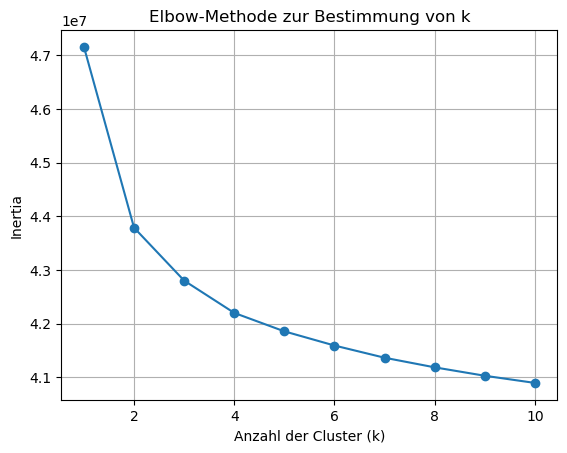

In [14]:
#Elbow-Plot zur Wahl der optimalen Clusterzahl 
plt.plot(K, a, marker='o')
plt.xlabel('Anzahl der Cluster (k)')
plt.ylabel('Inertia')
plt.title('Elbow-Methode zur Bestimmung von k')
plt.grid(True)
plt.show()

In [15]:
#Kein klarer Knick zu sehen, aber zwischen k=3 und k=5 flacht die Kurve ab
#Reduzierung auf 10 Dimensionen durch PCA 
pca = PCA(n_components=10)
ATAC_pca10 = pca.fit_transform(ATAC_scaled)

In [16]:
#Clustering mit k=(3,4,5) ausprobieren
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_3.fit(ATAC_scaled)

kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_4.fit(ATAC_scaled)

kmeans_5 = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans_5.fit(ATAC_scaled)

labels_3 = kmeans_3.labels_
labels_4 = kmeans_4.labels_
labels_5 = kmeans_5.labels_

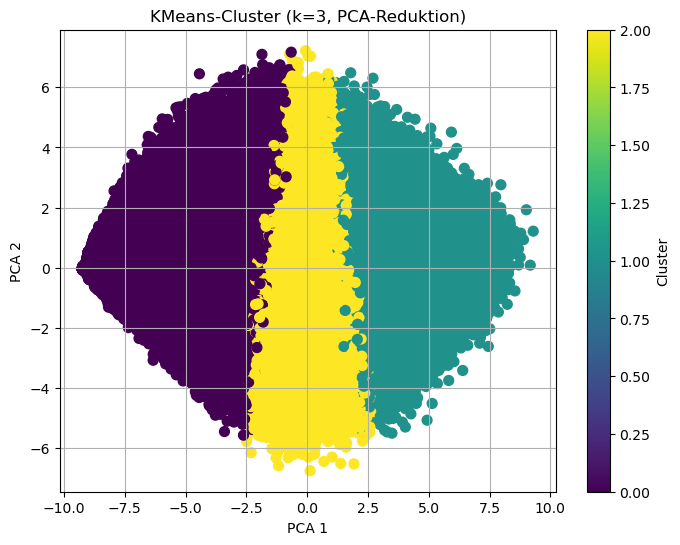

In [17]:
#Zur Visualisierung PCA und Cluster-Plot 
pca = PCA(n_components=2)
ATAC_pca = pca.fit_transform(ATAC_scaled)

#für k=3
plt.figure(figsize=(8,6))
plt.scatter(ATAC_pca[:, 0], ATAC_pca[:, 1], c=labels_3, cmap='viridis', s=50)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('KMeans-Cluster (k=3, PCA-Reduktion)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

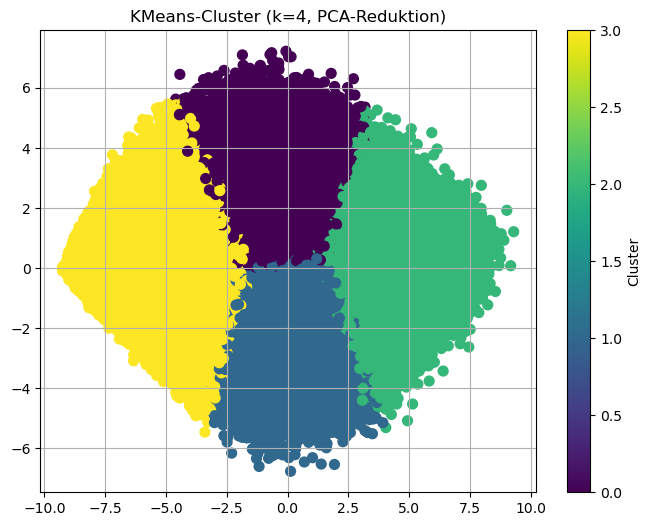

In [18]:
#für k=4
plt.figure(figsize=(8,6))
plt.scatter(ATAC_pca[:, 0], ATAC_pca[:, 1], c=labels_4, cmap='viridis', s=50)
plt.title('KMeans-Cluster (k=4, PCA-Reduktion)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

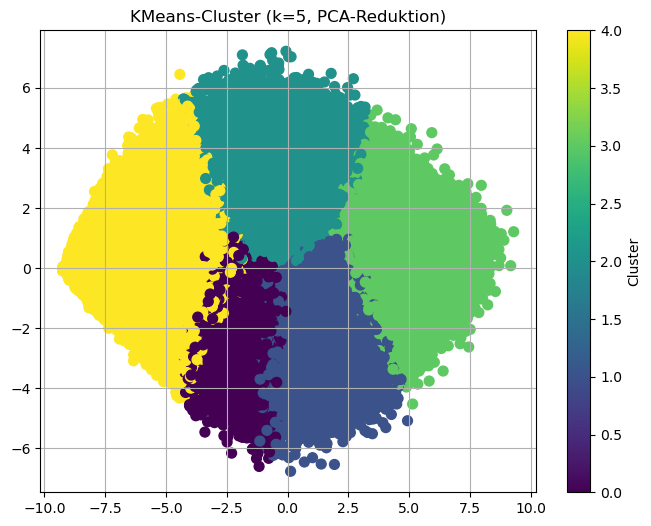

In [19]:
#für k=5
plt.figure(figsize=(8,6))
plt.scatter(ATAC_pca[:, 0], ATAC_pca[:, 1], c=labels_5, cmap='viridis', s=50)
plt.title('KMeans-Cluster (k=5, PCA-Reduktion)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

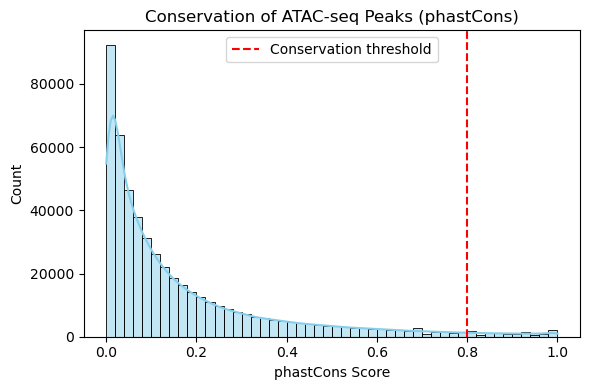

In [20]:
# PhastCons Conservation Score Distribution of ATAC-seq Peaks
phast_scores = ATAC["mm10.60way.phastCons_scores"].dropna()

plt.figure(figsize=(6, 4))
sns.histplot(phast_scores, bins=50, kde=True, color='skyblue')
plt.axvline(0.8, color='red', linestyle='--', label='Conservation threshold')
plt.xlabel('phastCons Score')
plt.title('Conservation of ATAC-seq Peaks (phastCons)')
plt.legend()
plt.tight_layout()
plt.show()


/opt/miniconda3/envs/envBCells1/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


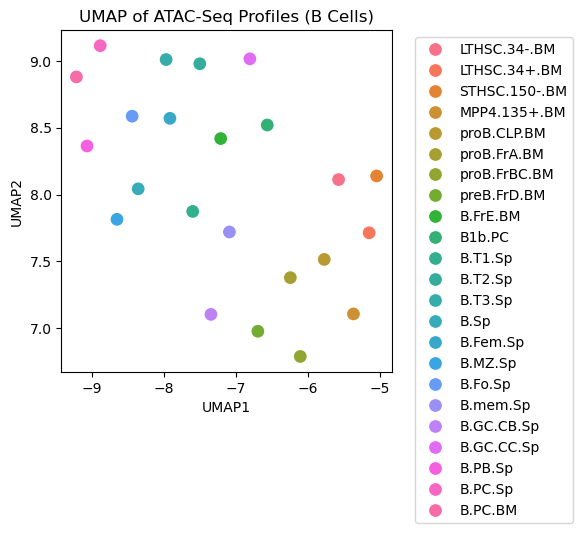

In [21]:
# Select the cell columns (columns 9 to 31; Python is zero-indexed, so columns 8 to 30)
cell_columns = ATAC.columns[8:31]

# Peak matrix: rows = peaks, columns = cells
signal = ATAC[cell_columns]

# Convert to numpy array
signal_values = signal.values

# Clean NaN and infinite values
signal_clean = np.nan_to_num(signal_values, nan=0.0, posinf=1e10, neginf=-1e10)

# Standardize the data
signal_scaled = StandardScaler().fit_transform(signal_clean)

# UMAP (transpose so cells are rows)
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(signal_scaled.T)

# Create a DataFrame with UMAP results and cell names
umap_df = pd.DataFrame(embedding, columns=["UMAP1", "UMAP2"])
umap_df["Sample"] = cell_columns

# Plot
plt.figure(figsize=(6, 5))
sns.scatterplot(data=umap_df, x="UMAP1", y="UMAP2", hue="Sample", s=100)
plt.title("UMAP of ATAC-Seq Profiles (B Cells)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# ATAC transposed dataset - B-cell specific

In [22]:
# of scaled values
ATAC_scaled_Peaks_Bcells = ATAC_scaled.iloc[:, 2:31]
ATAC_T_scaled_Bcells = ATAC_scaled_Peaks_Bcells.T
ATAC_T_scaled_Bcells.head()

,0,1,2,3,4,5,6,7,8,9,...,512580,512581,512582,512583,512584,512585,512586,512587,512588,512589
LTHSC.34-.BM,-0.622619,-0.622619,0.723878,-0.622619,-0.622619,0.723878,-0.622619,0.723878,0.767295,-0.621946,...,0.767295,-0.622619,-0.622619,-0.622619,0.723878,0.767295,-0.622619,-0.622619,-0.622619,-0.622619
LTHSC.34+.BM,-0.913335,0.737160,-0.913378,-0.913378,-0.913378,0.737160,-0.913378,-0.913335,-0.913378,-0.913378,...,-0.912441,0.558881,2.355367,0.156853,1.138976,1.138976,0.156853,-0.913335,0.737160,-0.913335
STHSC.150-.BM,-0.818014,-0.818014,-0.818014,-0.818063,-0.818063,1.077905,-0.818063,-0.818014,-0.818014,-0.818063,...,0.451491,0.722929,0.345481,1.077905,-0.818014,0.345481,0.345481,-0.818063,-0.818063,-0.818014
MPP4.135+.BM,-0.843321,-0.843278,-0.843321,-0.843321,-0.843321,0.409772,-0.843321,-0.843321,-0.843321,-0.843321,...,-0.025909,0.411606,1.642998,0.218844,1.642998,0.411606,1.862672,-0.843278,-0.843278,0.218844
proB.CLP.BM,0.867794,-0.960118,-0.960118,-0.960101,-0.960118,1.488393,-0.960137,0.148332,-0.960120,-0.960118,...,1.482909,0.172555,0.772231,0.524194,1.473752,1.397622,-0.057541,-0.960095,-0.960095,0.694450


In [23]:
# included in systematic analysis - makes more sense because we only look at B-cells anyway
ATAC_included_values_Bcells = ATAC_included_values.iloc[:, 2:25]
ATAC_T_included_values_Bcells = ATAC_included_values_Bcells.T
ATAC_T_included_values_Bcells.head()

,0,1,2,3,4,5,6,7,8,9,...,512585,512586,512587,512588,512589,512590,512591,512592,512593,512594
LTHSC.34-.BM,0.41,0.41,13181.00,0.41,0.41,13181.0,0.41,13181.00,13606.00,7.00,...,13606.00,0.41,0.41,0.41,13181.0,13606.0,0.41,0.41,0.41,0.41
LTHSC.34+.BM,0.71,23377.00,0.10,0.10,0.10,23377.0,0.10,0.71,0.10,0.10,...,13.37,20852.00,46296.00,15158.00,29068.0,29068.0,15158.00,0.71,23377.00,0.71
STHSC.150-.BM,0.90,0.90,0.90,0.11,0.11,31048.0,0.11,0.90,0.90,0.11,...,20790.00,25235.00,19054.00,31048.00,0.9,19054.0,19054.00,0.11,0.11,0.90
MPP4.135+.BM,0.11,0.83,0.11,0.11,0.11,21186.0,0.11,0.11,0.11,0.11,...,13820.00,21217.00,42036.00,17958.00,42036.0,21217.0,45750.00,0.83,0.83,17958.00
proB.CLP.BM,34335.00,0.47,0.47,0.79,0.47,45992.0,0.11,20821.00,0.42,0.47,...,45889.00,21276.00,32540.00,27881.00,45717.0,44287.0,16954.00,0.90,0.90,31079.00


# Plots

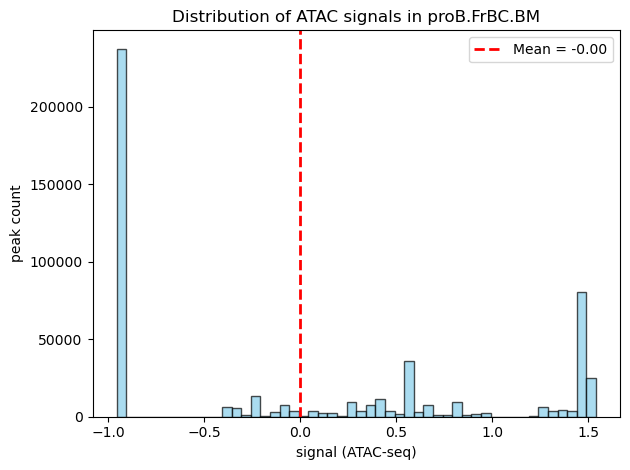

In [24]:
# select column – z. B. for examole cell type "proB.FrBC.BM"
values = ATAC_scaled["proB.FrBC.BM"].dropna()

# calculate mean
mean_val = values.mean()

# Histogram with mean line
plt.hist(values, bins=50, color="skyblue", edgecolor="black", alpha=0.7)
plt.axvline(mean_val, color="red", linestyle="dashed", linewidth=2, label=f"Mean = {mean_val:.2f}")
plt.xlabel("signal (ATAC-seq)")
plt.ylabel("peak count")
plt.title("Distribution of ATAC signals in proB.FrBC.BM")
plt.legend()
plt.tight_layout()
plt.show()

### Distribution of average peak signals in B cells - Histogram

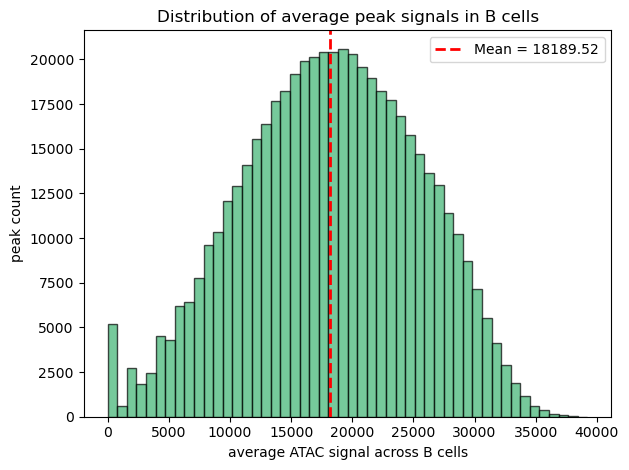

In [25]:
# matrix with ATAC-Seq peaks of B-cells
signal_columns = ATAC_included_values.columns[2:25] 

# mean across columns of B-cells (per row)
ATAC_included_values["peak_mean_signal"] = ATAC_included_values[signal_columns].mean(axis=1)

# Histogramm des Mittelwerts aller Peaks
plt.hist(ATAC_included_values["peak_mean_signal"].dropna(), bins=50, color="mediumseagreen", edgecolor="black", alpha=0.7)
plt.axvline(ATAC_included_values["peak_mean_signal"].mean(), color="red", linestyle="dashed", linewidth=2, label=f"Mean = {ATAC_included_values['peak_mean_signal'].mean():.2f}")
plt.xlabel("average ATAC signal across B cells")
plt.ylabel("peak count")
plt.title("Distribution of average peak signals in B cells")
plt.legend()
plt.tight_layout()
plt.show()

### Distribution of ATAC-Seq mean values per B-cell specific cell types - Histogram

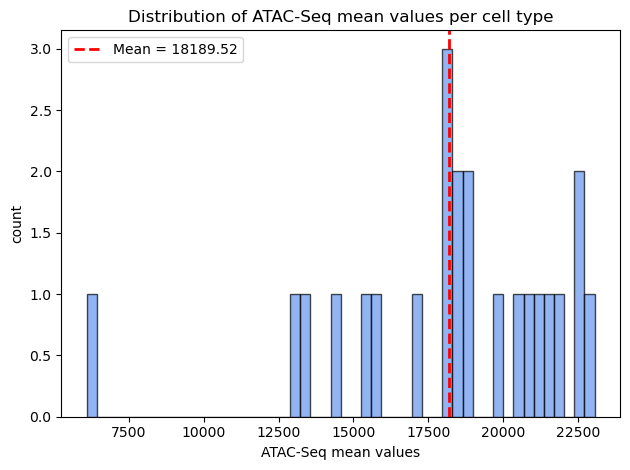

In [26]:

# copy of the B-cell specific transformed matrix
ATAC_T_included_values_Bcells_copy = ATAC_T_included_values_Bcells.copy()

# mean per row across all columns
ATAC_T_included_values_Bcells_copy["row_mean"] = ATAC_T_included_values_Bcells_copy.mean(axis=1)

# Histogramm plotten
plt.hist(ATAC_T_included_values_Bcells_copy["row_mean"].dropna(), bins=50, color="cornflowerblue", edgecolor="black", alpha=0.7)
plt.axvline(ATAC_T_included_values_Bcells_copy["row_mean"].mean(), color="red", linestyle="dashed", linewidth=2, label=f"Mean = {ATAC_T_included_values_Bcells_copy['row_mean'].mean():.2f}")
plt.xlabel("ATAC-Seq mean values")
plt.ylabel("count")
plt.title("Distribution of ATAC-Seq mean values per cell type")
plt.legend()
plt.tight_layout()
plt.show()

### Distribution of ATAC-Seq median values per B-cell specific cell types - Histogram

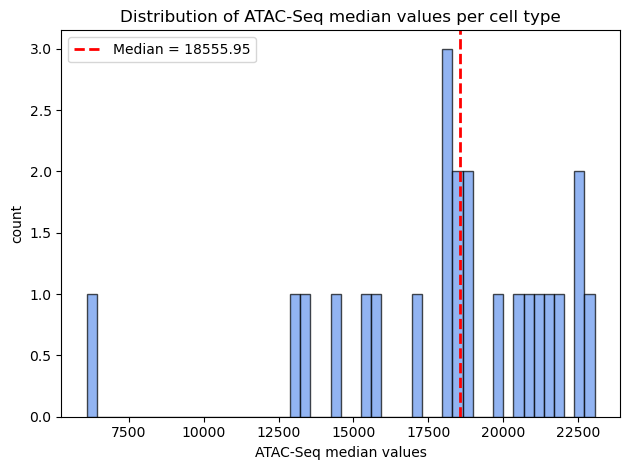

In [27]:

# copy of the B-cell specific transformed matrix
ATAC_T_included_values_Bcells_copy = ATAC_T_included_values_Bcells.copy()

# median per row across all columns
ATAC_T_included_values_Bcells_copy["row_mean"] = ATAC_T_included_values_Bcells_copy.mean(axis=1)

# Histogramm plotten
plt.hist(ATAC_T_included_values_Bcells_copy["row_mean"].dropna(), bins=50, color="cornflowerblue", edgecolor="black", alpha=0.7)
plt.axvline(ATAC_T_included_values_Bcells_copy["row_mean"].median(), color="red", linestyle="dashed", linewidth=2, label=f"Median = {ATAC_T_included_values_Bcells_copy['row_mean'].median():.2f}")
plt.xlabel("ATAC-Seq median values")
plt.ylabel("count")
plt.title("Distribution of ATAC-Seq median values per cell type")
plt.legend()
plt.tight_layout()
plt.show()

### Significance vs. conservation - Scatter plot

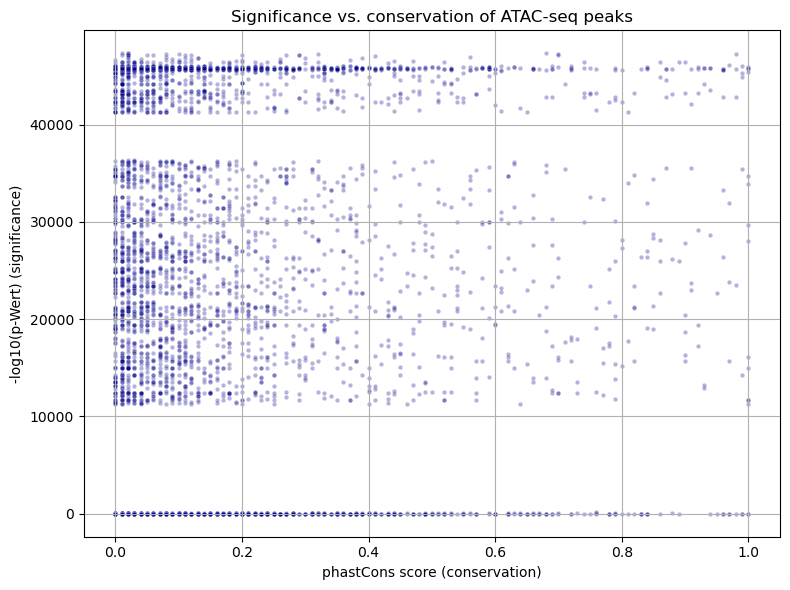

In [28]:
# selection of the two columns

ATAC_filtered = ATAC[["_-log10_bestPvalue", "mm10.60way.phastCons_scores"]].dropna()

# scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=ATAC_filtered.sample(n=5000, random_state=42),  # optional: nur 5000 Punkte für bessere Performance
    x="mm10.60way.phastCons_scores",
    y="_-log10_bestPvalue",
    alpha=0.3,
    s=10,
    color="darkblue"
)
plt.xlabel("phastCons score (conservation)")
plt.ylabel("-log10(p-Wert) (significance)")
plt.title("Significance vs. conservation of ATAC-seq peaks")
plt.grid(True)
plt.tight_layout()
plt.show()


### 1. Differences and similarities of the chromatin landscape between immune cells

#### i. How variable is the chromatin signal within cells?

##### a) Is the signal dependent on sequencing depth, number of input cells, QC metric?

For that we first calculated the mean signal for all peaks per cell type.
Afterwards we linked the QC data with the signal. A scatterplot shows the Signal vs.different aspects. Then we calculated the correlation and visualized it. 

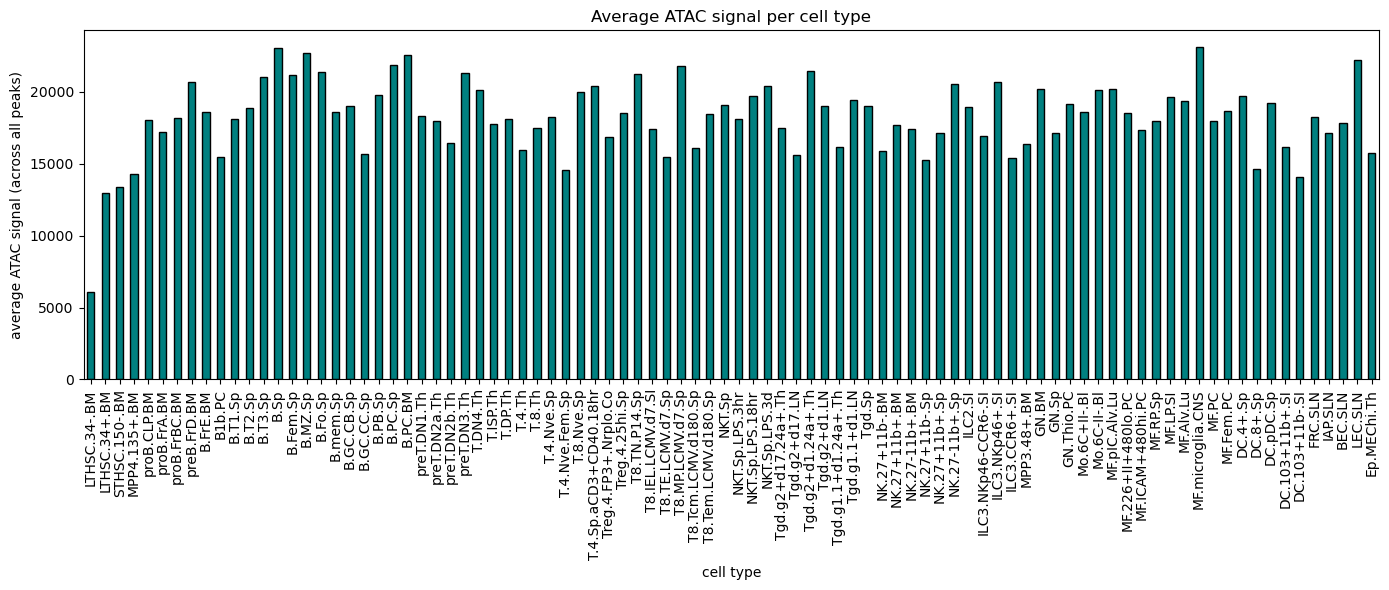

In [29]:
# matrix with all cell types and corresponding ATAC-seq peaks
celltype_columns = ATAC_scaled.columns[2:92] 

# mean per cell type (across all peaks)
celltype_means = ATAC[celltype_columns].mean()

# plot
plt.figure(figsize=(14, 6))
celltype_means.plot(kind="bar", color="teal", edgecolor="black")
plt.ylabel("average ATAC signal (across all peaks)")
plt.xlabel("cell type")
plt.title("Average ATAC signal per cell type")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



In [30]:
# load the converted QC matric 
QC_conv_num = pd.read_csv("data/QC_converted_numerical.CSV")

#ATAC means into data frame
ATAC_mean_df = celltype_means.reset_index()
ATAC_mean_df.columns = ['CellType', 'ATAC_mean']

#group QC/ 
QC_mean = QC_conv_num.groupby("CellType").mean()

#link mean values with the QC data
ATAC_combined = pd.merge(ATAC_mean_df, QC_mean, on='CellType')
ATAC_combined = ATAC_combined.rename(columns={0: "ATAC_mean"})

ATAC_combined.head()


,CellType,ATAC_mean,InputCellNumber,PF.reads,%chrM.mapped,Paired.read.after.removing.PCR.duplication,%fragment.1Kb_TSS,Replicate.cor
0,LTHSC.34-.BM,6095.046919,677.0,22287984.0,4.580,2470102.0,10.600,NaN
1,LTHSC.34+.BM,12936.332385,2483.0,28588536.0,3.170,7675501.0,7.700,NaN
2,STHSC.150-.BM,13396.369554,3660.0,22170346.0,3.250,6060045.0,11.130,NaN
3,MPP4.135+.BM,14257.896763,10000.0,24003590.0,13.830,6128252.0,18.960,NaN
4,proB.CLP.BM,18034.640712,10000.0,21903414.0,9.035,6347376.5,15.605,0.868


In [31]:
print(ATAC_combined.columns)

Index(['CellType', 'ATAC_mean', 'InputCellNumber', 'PF.reads', '%chrM.mapped',
       'Paired.read.after.removing.PCR.duplication', '%fragment.1Kb_TSS',
       'Replicate.cor'],
      dtype='object')


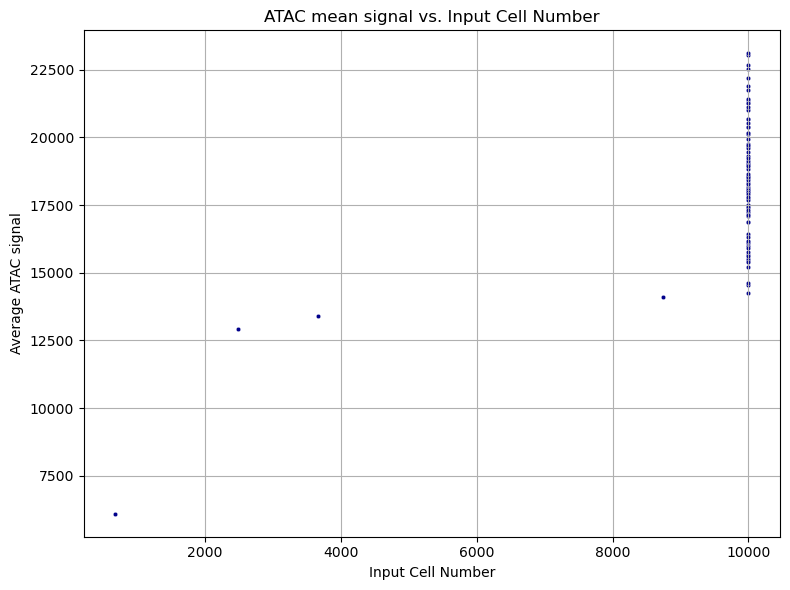

In [32]:
#scatterplot of ATAC-Signal vs. Input Cell number
plt.figure(figsize=(8, 6))
sns.scatterplot(data=ATAC_combined, x="InputCellNumber", y="ATAC_mean", alpha=1.0, s=10, color="darkblue")

plt.xlabel("Input Cell Number")
plt.ylabel("Average ATAC signal")
plt.title("ATAC mean signal vs. Input Cell Number")
plt.grid(True)
plt.tight_layout()
plt.show()

In [33]:
# does input cell number really just contain 10.000?
ATAC_combined["InputCellNumber"].value_counts()

InputCellNumber
10000.0    85
677.0       1
2483.0      1
3660.0      1
8750.0      1
Name: count, dtype: int64

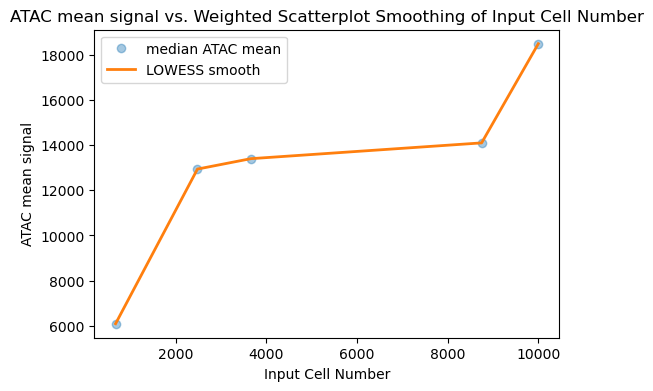

In [48]:
aggregated_data = ATAC_combined.groupby("InputCellNumber").ATAC_mean.agg(["median","count"])

lowess = sm.nonparametric.lowess
aggregated_data["sm"] = lowess(aggregated_data["median"], aggregated_data.index, frac=0.4)[:,1]

# Make sure your index is sorted
aggregated_data = aggregated_data.sort_index()

# Plot the raw medians and the LOWESS smooth
plt.figure(figsize=(6,4))
plt.plot(aggregated_data.index, aggregated_data["median"], "o", alpha=0.4, label="median ATAC mean")
plt.plot(aggregated_data.index, aggregated_data["sm"], "-", lw=2, label="LOWESS smooth")
plt.title("ATAC mean signal vs. Weighted Scatterplot Smoothing of Input Cell Number")
plt.xlabel("Input Cell Number")
plt.ylabel("ATAC mean signal")
plt.legend()
plt.show()




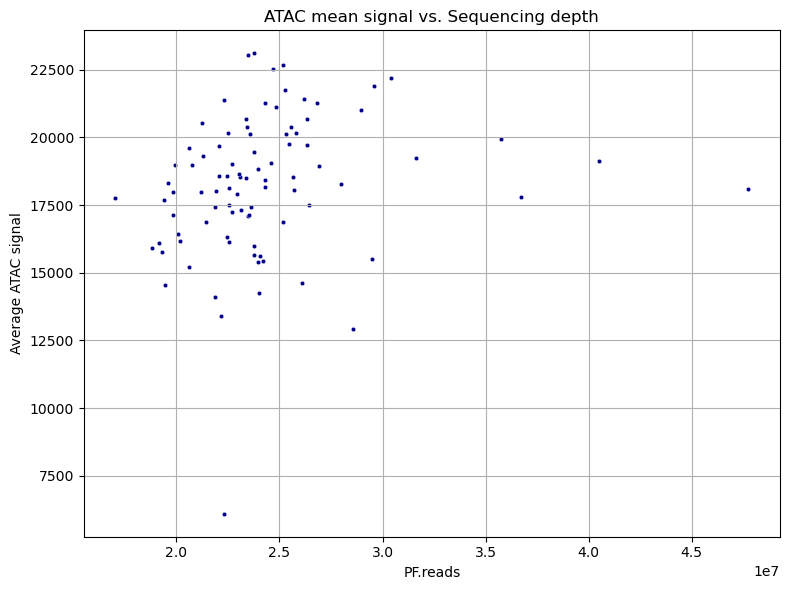

In [46]:
#scatterplot of ATAC-Signal vs. Sequencing depth
plt.figure(figsize=(8, 6))
sns.scatterplot(data=ATAC_combined, x="PF.reads", y="ATAC_mean", alpha=1.0, s=10, color="darkblue")

plt.xlabel("PF.reads")
plt.ylabel("Average ATAC signal")
plt.title("ATAC mean signal vs. Sequencing depth")
plt.grid(True)
plt.tight_layout()
plt.show()

#says how many reads there are -> more mean better information 
# do you only look at strongly open parts (low sequencing depth) or also at weakly open parts (high depth)

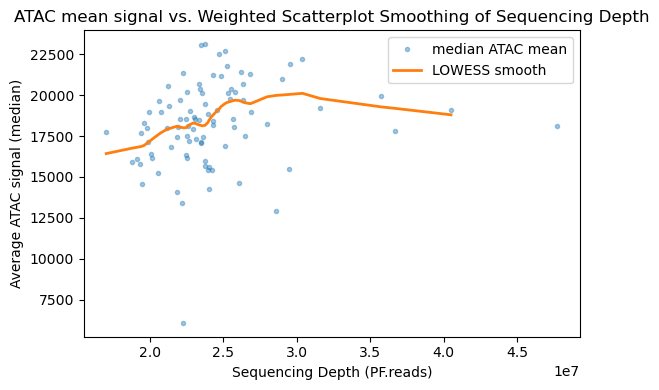

In [49]:
from statsmodels.nonparametric.smoothers_lowess import lowess

# 1) Extract x & y as simple NumPy arrays
x = aggregated_data_depth.index.values
y = aggregated_data_depth["median"].values

# 2) Run LOWESS — this returns an array of shape (m,2), where m ≤ len(x)
smoothed = lowess(y, x, frac=0.4)

# 3) Turn that into a Series whose index is the sorted x’s
sm_series = pd.Series(
    data=smoothed[:,1],
    index=smoothed[:,0]
)

# 4) Re‐index it onto your DataFrame’s full index (fills missing with NaN)
aggregated_data_depth["sm"] = sm_series.reindex(aggregated_data_depth.index)

plt.figure(figsize=(6,4))
plt.plot(aggregated_data_depth.index, aggregated_data_depth["median"], ".", alpha=0.4, label="median ATAC mean")    
plt.plot(aggregated_data_depth.index, aggregated_data_depth["sm"], "-", lw=2, label="LOWESS smooth")
plt.title("ATAC mean signal vs. Weighted Scatterplot Smoothing of Sequencing Depth")
plt.xlabel("Sequencing Depth (PF.reads)")
plt.ylabel("Average ATAC signal (median)")
plt.legend()
plt.tight_layout()
plt.show()

# there is an upward trend in for few reads, which plateaus at around 25,000,000 reads


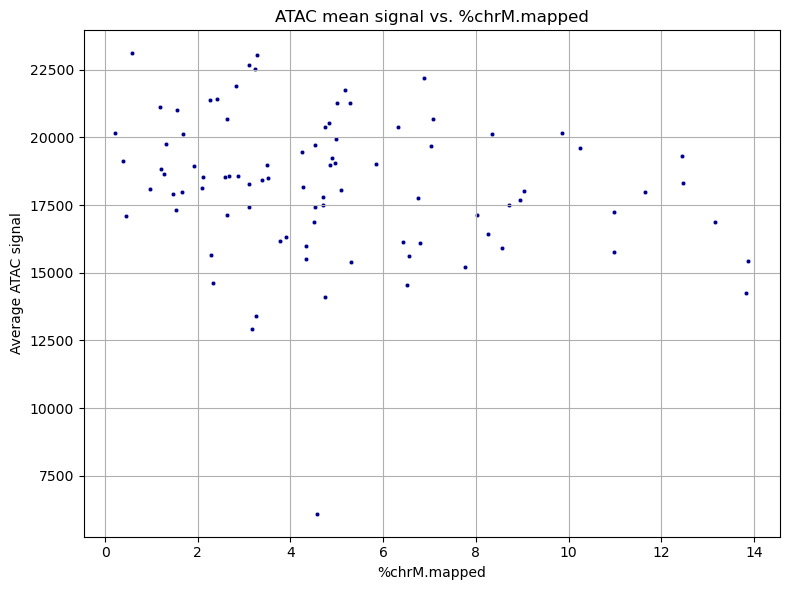

In [50]:
#scatterplot of ATAC-Signal vs. %chrM.mapped
plt.figure(figsize=(8, 6))
sns.scatterplot(data=ATAC_combined, x="%chrM.mapped", y="ATAC_mean", alpha=1.0, s=10, color="darkblue")

plt.xlabel("%chrM.mapped")
plt.ylabel("Average ATAC signal")
plt.title("ATAC mean signal vs. %chrM.mapped")
plt.grid(True)
plt.tight_layout()
plt.show()

#how many reads are from mitochondria (not useful)

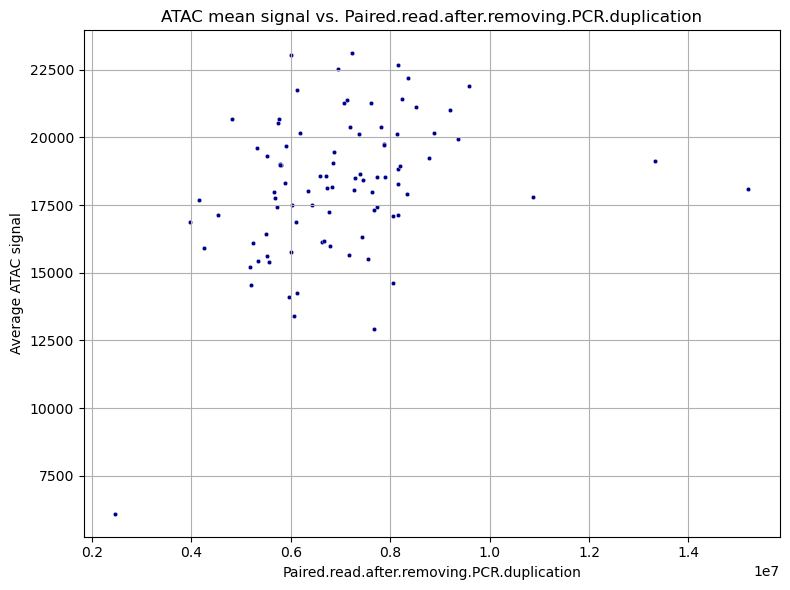

In [51]:
#scatterplot of ATAC-Signal vs. Paired.read.after.removing.PCR.duplication
plt.figure(figsize=(8, 6))
sns.scatterplot(data=ATAC_combined, x="Paired.read.after.removing.PCR.duplication", y="ATAC_mean", alpha=1.0, s=10, color="darkblue")

plt.xlabel("Paired.read.after.removing.PCR.duplication")
plt.ylabel("Average ATAC signal")
plt.title("ATAC mean signal vs. Paired.read.after.removing.PCR.duplication")
plt.grid(True)
plt.tight_layout()
plt.show()

#how many unique reads after removing duplications 

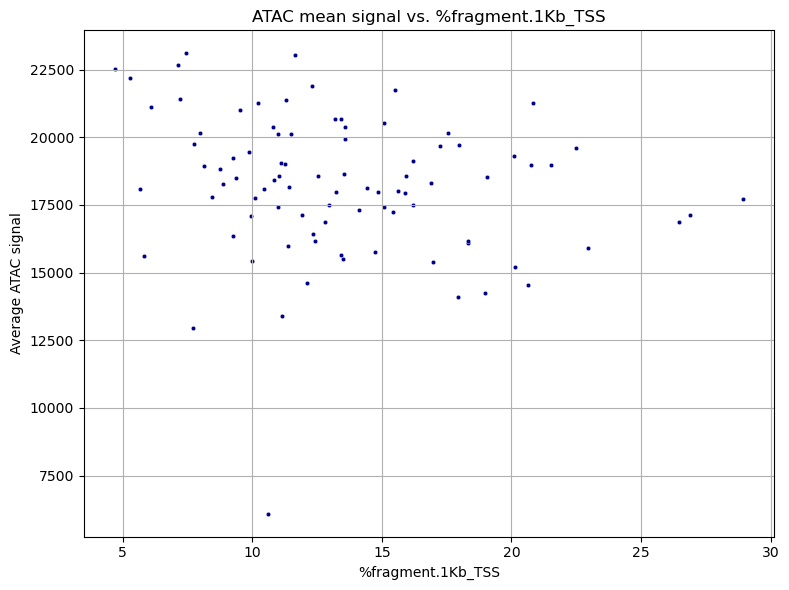

In [52]:
#scatterplot of ATAC-Signal vs. %fragment.1Kb_TSS
plt.figure(figsize=(8, 6))
sns.scatterplot(data=ATAC_combined, x="%fragment.1Kb_TSS", y="ATAC_mean", alpha=1.0, s=10, color="darkblue")

plt.xlabel("%fragment.1Kb_TSS")
plt.ylabel("Average ATAC signal")
plt.title("ATAC mean signal vs. %fragment.1Kb_TSS")
plt.grid(True)
plt.tight_layout()
plt.show()

#how many reads are close to start of gene

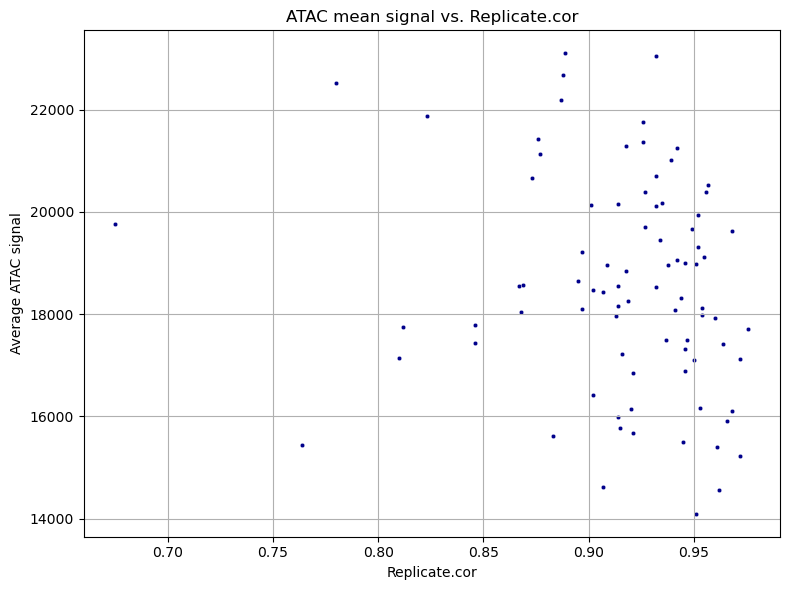

In [53]:
#scatterplot of ATAC-Signal vs. Replicate.cor
plt.figure(figsize=(8, 6))
sns.scatterplot(data=ATAC_combined, x="Replicate.cor", y="ATAC_mean", alpha=1.0, s=10, color="darkblue")

plt.xlabel("Replicate.cor")
plt.ylabel("Average ATAC signal")
plt.title("ATAC mean signal vs. Replicate.cor")
plt.grid(True)
plt.tight_layout()
plt.show()

#how similar was the experiment when doing it multiple times 

In [54]:
ATAC_combined.info()


<class 'pandas.core.frame.DataFrame'>
Index: 91 entries, LTHSC.34-.BM to FRC.CD140a+.Madcam-.CD35-.SLN
Data columns (total 7 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   ATAC_mean                                   90 non-null     float64
 1   InputCellNumber                             90 non-null     float64
 2   PF.reads                                    90 non-null     float64
 3   %chrM.mapped                                90 non-null     float64
 4   Paired.read.after.removing.PCR.duplication  90 non-null     float64
 5   %fragment.1Kb_TSS                           90 non-null     float64
 6   Replicate.cor                               85 non-null     float64
dtypes: float64(7)
memory usage: 7.7+ KB


In [55]:
#ATAC combined nur float 
ATAC_combined_num = ATAC_combined.iloc[:, 1:8]
ATAC_combined_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91 entries, LTHSC.34-.BM to FRC.CD140a+.Madcam-.CD35-.SLN
Data columns (total 6 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   InputCellNumber                             90 non-null     float64
 1   PF.reads                                    90 non-null     float64
 2   %chrM.mapped                                90 non-null     float64
 3   Paired.read.after.removing.PCR.duplication  90 non-null     float64
 4   %fragment.1Kb_TSS                           90 non-null     float64
 5   Replicate.cor                               85 non-null     float64
dtypes: float64(6)
memory usage: 7.0+ KB


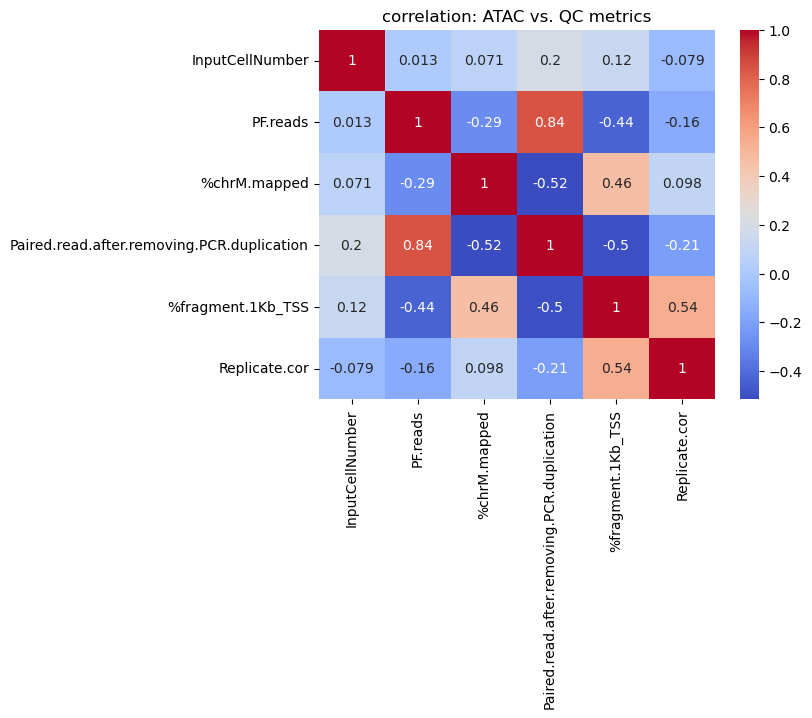

In [56]:
# correlation 
corr = ATAC_combined_num.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("correlation: ATAC vs. QC metrics")
plt.show()


ATAC signal is not depended on Replicate.cor, %fragment.1Kb_TSS, PF.read and %chrM.mapped. It is weakly depended on Paired.read.after.removing.PCR.duplication and strongly depended on InputCellNumbers

##### b) Should some cell types be removed or normalized?

In [57]:
#ATAC means into data frame
ATAC_mean_df = celltype_means.reset_index()
ATAC_mean_df.columns = ['CellType', 'ATAC_mean']

#group QC/ 
QC_mean = QC_conv_num.groupby("CellType").mean()

#link mean values with the QC data
ATAC_combined = pd.merge(ATAC_mean_df, QC_mean, on='CellType')
ATAC_combined = ATAC_combined.rename(columns={0: "ATAC_mean"})

ATAC_combined.head()


,CellType,ATAC_mean,InputCellNumber,PF.reads,%chrM.mapped,Paired.read.after.removing.PCR.duplication,%fragment.1Kb_TSS,Replicate.cor
0,LTHSC.34-.BM,6095.046919,677.0,22287984.0,4.580,2470102.0,10.600,NaN
1,LTHSC.34+.BM,12936.332385,2483.0,28588536.0,3.170,7675501.0,7.700,NaN
2,STHSC.150-.BM,13396.369554,3660.0,22170346.0,3.250,6060045.0,11.130,NaN
3,MPP4.135+.BM,14257.896763,10000.0,24003590.0,13.830,6128252.0,18.960,NaN
4,proB.CLP.BM,18034.640712,10000.0,21903414.0,9.035,6347376.5,15.605,0.868


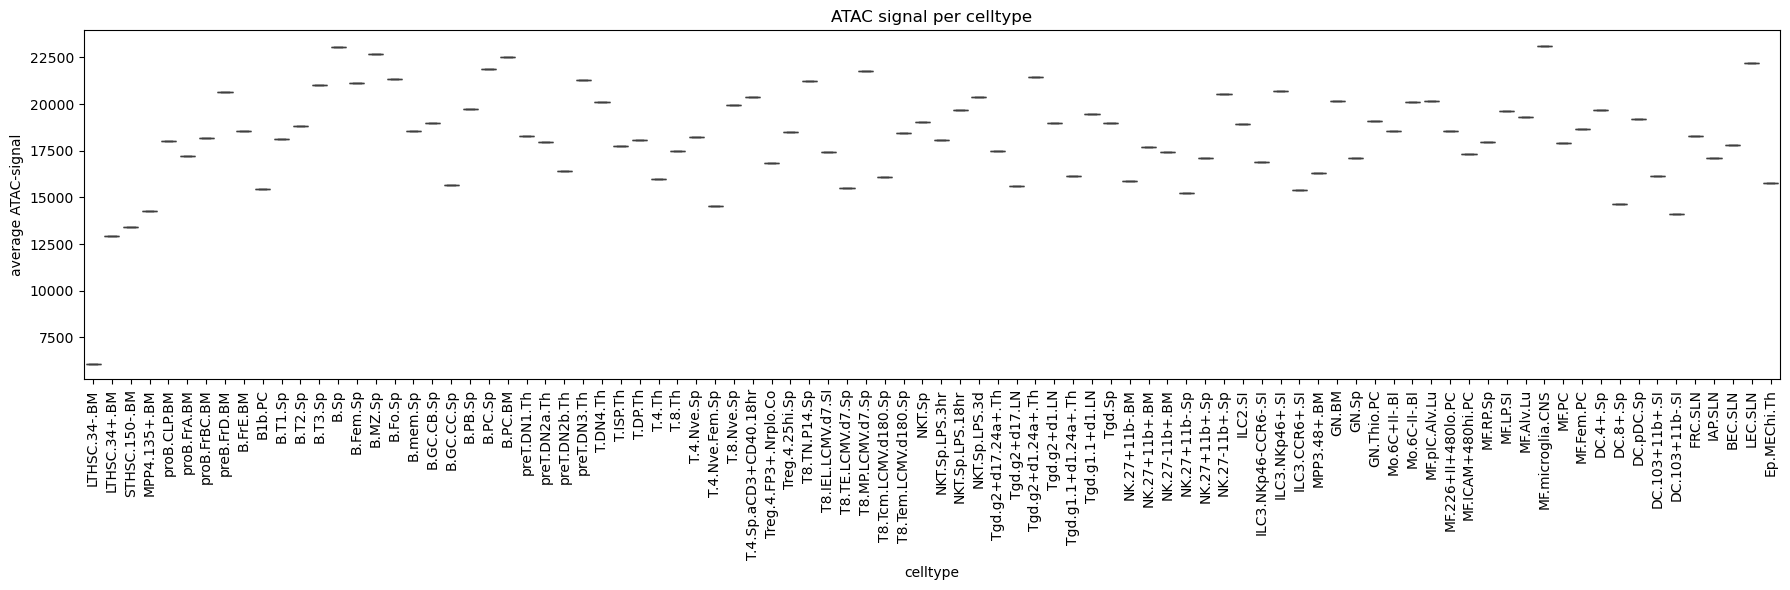

In [58]:
#ATAC means into data frame
ATAC_mean_df = celltype_means.reset_index()
ATAC_mean_df.columns = ['CellType', 'ATAC_mean']

#boxplot: ATAC signal for all celltypes
plt.figure(figsize=(18, 6))
sns.boxplot(data=ATAC_mean_df, x='CellType', y='ATAC_mean')
plt.xticks(rotation=90)
plt.title('ATAC signal per celltype')
plt.ylabel('average ATAC-signal')
plt.xlabel('celltype')
plt.tight_layout()
plt.show()

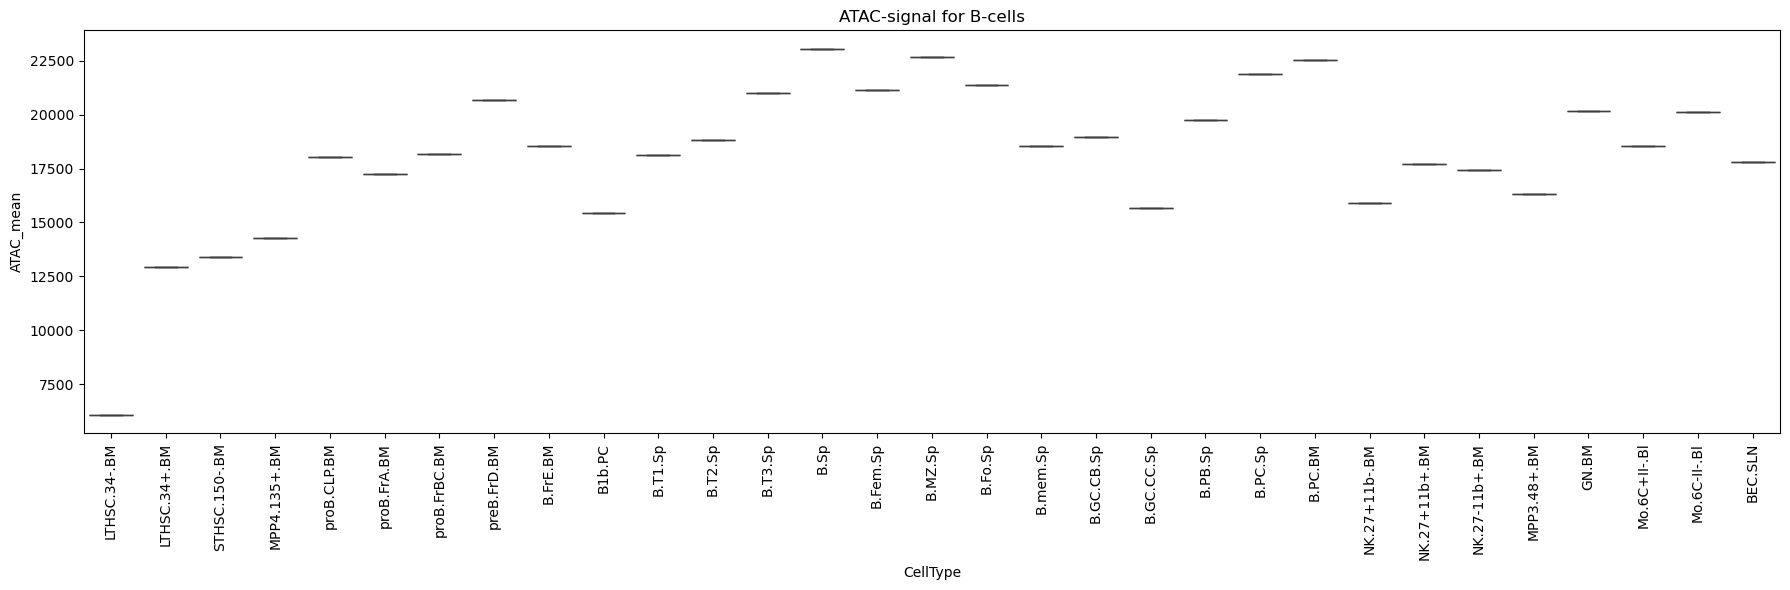

In [59]:
#isolate B-Cells
b_cells = ATAC_mean_df[ATAC_mean_df["CellType"].str.contains("B")]

plt.figure(figsize=(18, 6))
sns.boxplot(data=b_cells, x="CellType", y="ATAC_mean")
plt.xticks(rotation=90)
plt.title("ATAC-signal for B-cells")
plt.tight_layout()
plt.show()


# ACHTUNG: hier sind nicht nur B-Zellen im Diagramm müssten 8 (von rechts) weniger sein !!!

Celltypes containing a very low signal: LTHSC.34-BM
->should be removed/normalized

#### ii. How variable is the chromatin signal for CREs across cells?

##### a) Should peaks be removed due to lack of signal?

To solve this we did a Histogram with the mean signal across all samples for each Peak. With that we could find peaks that give no signal in the most cells -> chromatin is always closed 

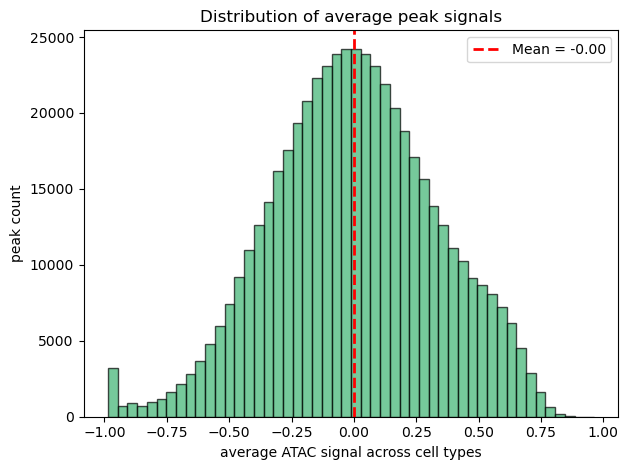

In [60]:
signal_columns = ATAC_scaled.columns[2:92] 

# Mean across these columns (per row)
ATAC_scaled["peak_mean_signal"] = ATAC_scaled[signal_columns].mean(axis=1)

# Histogram of the mean of all peaks
plt.hist(ATAC_scaled["peak_mean_signal"].dropna(), bins=50, color="mediumseagreen", edgecolor="black", alpha=0.7)
plt.axvline(ATAC_scaled["peak_mean_signal"].mean(), color="red", linestyle="dashed", linewidth=2, label=f"Mean = {ATAC_scaled['peak_mean_signal'].mean():.2f}")
plt.xlabel("average ATAC signal across cell types")
plt.ylabel("peak count")
plt.title("Distribution of average peak signals")
plt.legend()
plt.tight_layout()
plt.show()

In [61]:
# extract peaks with a low mean -> low signal
low_signal_peaks = ATAC_scaled[ATAC_scaled["peak_mean_signal"] < -0.8]
print(f"count of peaks with low mean signal: {len(low_signal_peaks)}")
low_signal_peaks.head()#
#low_signal_peaks contains low peaks -> low signal -> could be removed 
#you can change the threshold (-0.8) to make it more/less stright


count of peaks with low mean signal: 6231


,mm10.60way.phastCons_scores,_-log10_bestPvalue,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM,proB.CLP.BM,proB.FrA.BM,proB.FrBC.BM,preB.FrD.BM,...,DC.8+.Sp,DC.pDC.Sp,DC.103+11b+.SI,DC.103+11b-.SI,FRC.SLN,IAP.SLN,BEC.SLN,LEC.SLN,Ep.MEChi.Th,peak_mean_signal
31,0.812861,1.052346,-0.622619,-0.913378,-0.818063,-0.843321,-0.960137,-0.931487,-0.956155,1.334373,...,-0.867550,-1.047149,-0.903951,-0.842635,-0.343229,1.629110,-0.984936,0.062004,-0.887283,-0.811659
157,-0.219575,-1.319972,-0.610870,-0.903412,-0.812874,-0.838477,-0.955131,-0.927534,-0.953318,-1.101394,...,-0.861118,-1.042502,-0.899507,-0.837118,-0.987176,-0.926804,-0.979376,-1.155704,-0.879998,-0.983202
202,-0.121248,-1.320812,-0.618935,-0.909541,-0.816399,1.869355,-0.957918,-0.929453,-0.954753,-1.102748,...,-0.864847,-1.045179,-0.901671,-0.840177,-0.992575,-0.929080,-0.982825,-1.160350,-0.885439,-0.928467
244,1.107843,-1.320028,-0.617497,-0.908961,-0.815396,-0.839791,-0.955895,-0.927686,-0.953735,-1.101565,...,-0.864280,-1.043088,-0.900400,-0.839229,-0.991237,-0.928063,-0.980665,-1.159527,-0.882420,-0.958114
376,-0.121248,-1.315507,-0.607421,-0.897997,-0.808945,-0.831966,-0.950401,-0.921339,-0.948010,-1.097311,...,-0.857653,-1.038799,-0.896384,-0.833196,-0.984775,-0.921065,-0.974421,-1.152730,-0.876771,-0.978404


##### b) Do promoters exhibit specific signals vs enhancers?

In [62]:
Annotation = pd.read_csv("data/Transcript, Coding, and Exon Start and End Positions.CSV", sep=";")
Annotation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47382 entries, 0 to 47381
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gene Name               47382 non-null  object
 1   Transcript Name         47382 non-null  object
 2   Chromosome              47382 non-null  object
 3   Strand                  47382 non-null  object
 4   5' transcript Start     47382 non-null  int64 
 5   3' Transcript Start     47382 non-null  int64 
 6   Coding Region 5' Start  47382 non-null  int64 
 7   Coding Region 3' Start  47382 non-null  int64 
 8   Exon Count              47382 non-null  int64 
 9   Exon Starts             47382 non-null  object
 10  Exon Ends               47382 non-null  object
dtypes: int64(5), object(6)
memory usage: 4.0+ MB


In [63]:
Annotation.head()

,Gene Name,Transcript Name,Chromosome,Strand,5' transcript Start,3' Transcript Start,Coding Region 5' Start,Coding Region 3' Start,Exon Count,Exon Starts,Exon Ends
0,Wdsub1,NM_001159636,chr2,-,59855193,59882606,59855270,59878527,11,"59855193,59858609,59861560,59862619,59862816,5...","59855275,59858750,59861737,59862726,59862857,5..."
1,Rbm18,NM_001159635,chr2,-,36116078,36136704,36117814,36134247,6,"36116078,36120812,36122851,36127214,36134134,3...","36117974,36120898,36122938,36127251,36134263,3..."
2,Prrc2b,NM_001159634,chr2,+,32151147,32234537,32182511,32230742,32,"32151147,32182457,32183122,32185344,32187480,3...","32151291,32182626,32183300,32185447,32187553,3..."
3,Ildr2,NM_001164528,chr1,+,166254138,166316832,166254375,166310795,10,"166254138,166269304,166270498,166291415,166294...","166254466,166269637,166270618,166291472,166294..."
4,Perm1,NM_172417,chr4,+,156215926,156221307,156217000,156220222,4,"156215926,156216716,156219740,156220109,","156215975,156219185,156219866,156221307,"


In [64]:
#names of coloumns
for col in Annotation.columns:
    print(repr(col))

'Gene Name'
'Transcript Name'
'Chromosome'
'Strand'
"5' transcript Start"
"3' Transcript Start "
"Coding Region 5' Start"
"Coding Region 3' Start"
'Exon Count'
'Exon Starts '
'Exon Ends'


In [65]:
#create promotor annotation 
def promoter_regions(row):
    if row["Strand"] == "+":
        start = row["5' transcript Start"] - 1000
        end = row["5' transcript Start"] + 1000
    else:
        start = row["3' Transcript Start "] - 1000
        end = row["3' Transcript Start "] + 1000
    return pd.Series({"Chromosome": row["Chromosome"],"Start": start,"End": end,"Gene Name": row["Gene Name"]})

#add gene names 
promoters = Annotation.apply(promoter_regions, axis=1)

In [66]:
#prepare ATAC peaks
peaks = pd.DataFrame({"Chromosome": ATAC["chrom"],"Start": ATAC["Summit"],"End": ATAC["Summit"] + 1,"peak_id": ATAC["ImmGenATAC1219.peakID"]})

In [73]:
import pyranges as pr

In [74]:
#in PyRanges
promoter_ranges = pr.PyRanges(promoters)
peak_ranges = pr.PyRanges(peaks)

#Overlap
promoter_overlap = peak_ranges.join(promoter_ranges)

#IDs of peaks in promoters
promoter_peak_ids = promoter_overlap.df['peak_id'].unique()

# new coloumn: 'region' initial with 'Enhancer'
ATAC['region'] = 'Enhancer'

# Peaks with promotor
ATAC.loc[ATAC['ImmGenATAC1219.peakID'].isin(promoter_peak_ids), 'region'] = 'Promoter'

In [75]:
#check if its numerical 
print(ATAC.iloc[:, 8:].dtypes)

LTHSC.34-.BM     float64
LTHSC.34+.BM     float64
STHSC.150-.BM    float64
MPP4.135+.BM     float64
proB.CLP.BM      float64
                  ...   
IAP.SLN          float64
BEC.SLN          float64
LEC.SLN          float64
Ep.MEChi.Th      float64
region            object
Length: 91, dtype: object


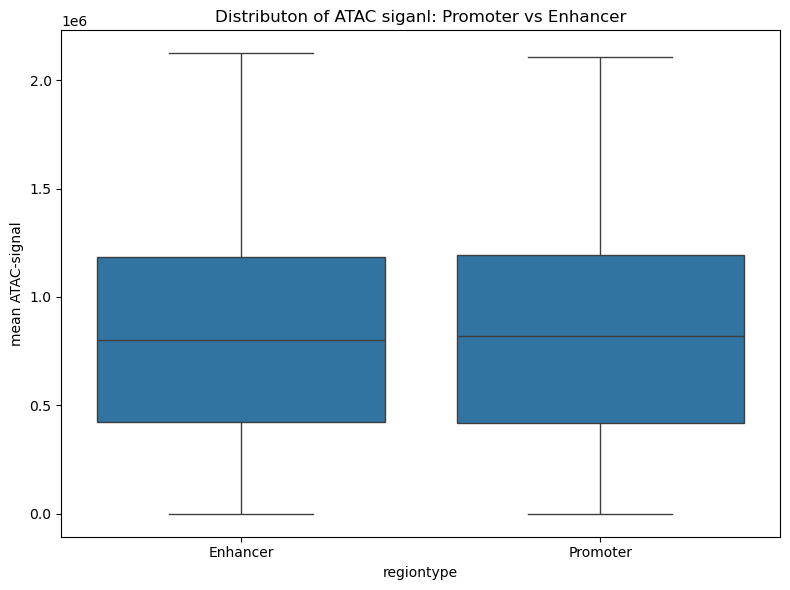

In [76]:
# calculate mean signals per peak
signal_cols = ATAC.select_dtypes(include=["float64", "int64"]).columns
ATAC['mean_signal'] = ATAC[signal_cols].mean(axis=1)

# Plot
plt.figure(figsize=(8,6))
sns.boxplot(data=ATAC, x='region', y='mean_signal')
plt.title("Distributon of ATAC siganl: Promoter vs Enhancer")
plt.ylabel("mean ATAC-signal")
plt.xlabel("regiontype")
plt.tight_layout()
plt.show()

Height and median of the boxes seems similar -> Promoters do not show significantly different chromatin accessibility compared to enhancers in this dataset. -> overall, promoter and enhancer regions probably have similar ATAC-seq signal levels.

#### iii. Do related cell types cluster together based on ATAC signal?

##### a) Does clustering reproduce known relationship?

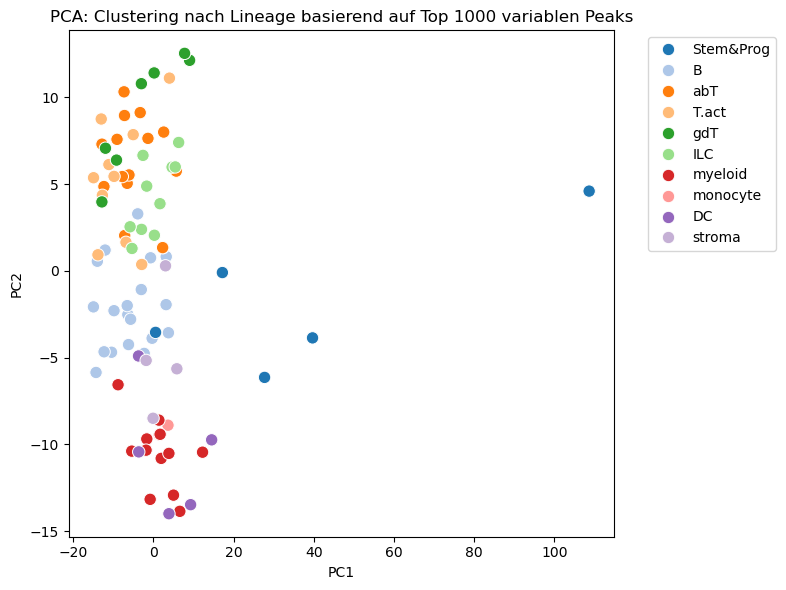

In [128]:
# Schritt 1: Top 1000 variabelste Peaks auswählen
variances = ATAC_scaled.var(axis=1)  # Zeilen = Peaks, da transponiert
top_peaks = variances.sort_values(ascending=False).head(1000).index
ATAC_reduced = ATAC_scaled.loc[top_peaks]  # Subset auf 1000 Peaks

# Schritt 2: Transponieren, damit Samples = Zeilen
df_pca_input = ATAC_reduced.T

# Schritt 3: PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_pca_input)

# Schritt 4: Ergebnis in DataFrame
df_pca = pd.DataFrame(pca_result, columns=["PC1", "PC2"], index=df_pca_input.index)

# Zelltyp-Annotation zuordnen
QC = pd.read_csv("data/ATAC_QCmatric.csv", sep=";")
QC.columns = QC.columns.str.strip()
QC["CellType"] = QC["CellType"].str.strip()

# Eindeutige CellTypes
qc_unique = QC.drop_duplicates(subset="CellType", keep="first")

# Mapping sicher durchführen
df_pca["Lineage"] = df_pca.index.map(qc_unique.set_index("CellType")["Lineage"])

# Schritt 5: Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="Lineage", palette="tab20", s=80)
plt.title("PCA: Clustering nach Lineage basierend auf Top 1000 variablen Peaks")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


C:\Users\annal\AppData\Local\Temp\ipykernel_27580\2174365556.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pca_without_outliner['cluster'] = fcluster(Z, t=4, criterion='maxclust')


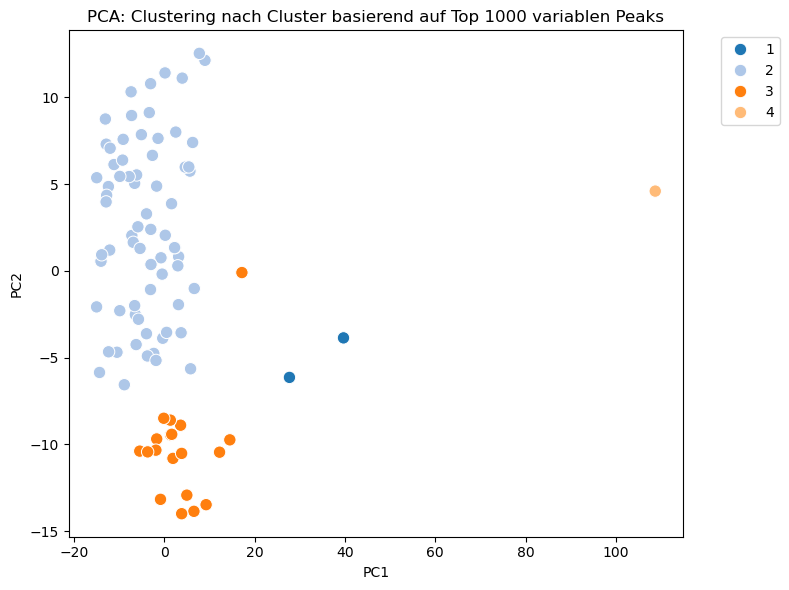

In [136]:
# clustering by coloring the clusters for comparison
Z = linkage(df_pca_without_outliner[['PC1','PC2']], method='average', metric='euclidean')

# the there is a outlier at the top of the plot, which we want to remove, because it is not in the upper pca either
mask = (df_pca["PC2"] <= 15) 
# mask is used to avoid an index error
df_pca_without_outliner = df_pca.loc[mask]


# cut into 2 clusters:
df_pca_without_outliner['cluster'] = fcluster(Z, t=4, criterion='maxclust')


plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca_without_outliner, x="PC1", y="PC2", hue="cluster", palette="tab20", s=80)
plt.title("PCA: Clustering nach Cluster basierend auf Top 1000 variablen Peaks")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [35.0, 35.0, 45.0, 45.0],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [55.0, 55.0, 72.5, 72.5],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [63.75, 63.75, 102.5, 102.5],
  [40.0, 40.0, 83.125, 83.125],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [125.0, 125.0, 142.5, 142.5],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [165.0, 165.0, 182.5, 182.5],
  [205.0, 205.0, 215.0, 215.0],
  [225.0, 225.0, 235.0, 235.0],
  [245.0, 245.0, 255.0, 255.0],
  [230.0, 230.0, 250.0, 250.0],
  [210.0, 210.0, 240.0, 240.0],
  [173.75, 173.75, 225.0, 225.0],
  [265.0, 265.0, 275.0, 275.0],
  [285.0, 285.0, 295.0, 295.0],
  [305.0, 305.0, 315.0, 315.0],
  [290.0, 290.0, 310.0, 310.0],
  [270.0, 270.0, 300.0, 300.0],
  [325.0, 325.0, 335.0, 335.0],
  [355.0, 355.0, 365.0, 365.0],
  [345.0, 345.0, 360.0, 360.0],
  [330.0, 330.0, 352.5, 352.5],
  [385.0, 385.0, 395.0, 395.0],
  [405.0, 405.0, 4

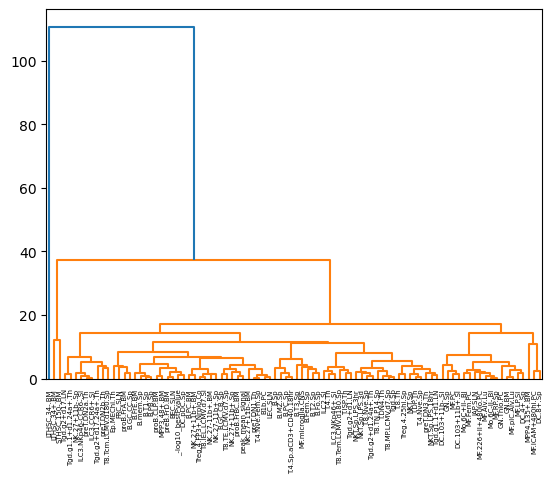

In [137]:
# optimal number of clusters for our pca above: dendrogram
Z = linkage(df_pca_without_outliner[['PC1','PC2']], method='average', metric='euclidean')
dendrogram(Z, labels=df_pca_without_outliner.index, leaf_rotation=90)

c:\Users\annal\miniconda3\envs\envBCells1\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\annal\AppData\Local\Temp\ipykernel_27580\445995480.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pca_without_outliner["UMAP1"] = embedding[:,0]
C:\Users\annal\AppData\Local\Temp\ipykernel_27580\445995480.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pca_without_outliner["UMAP2"] = embedding[:,1]


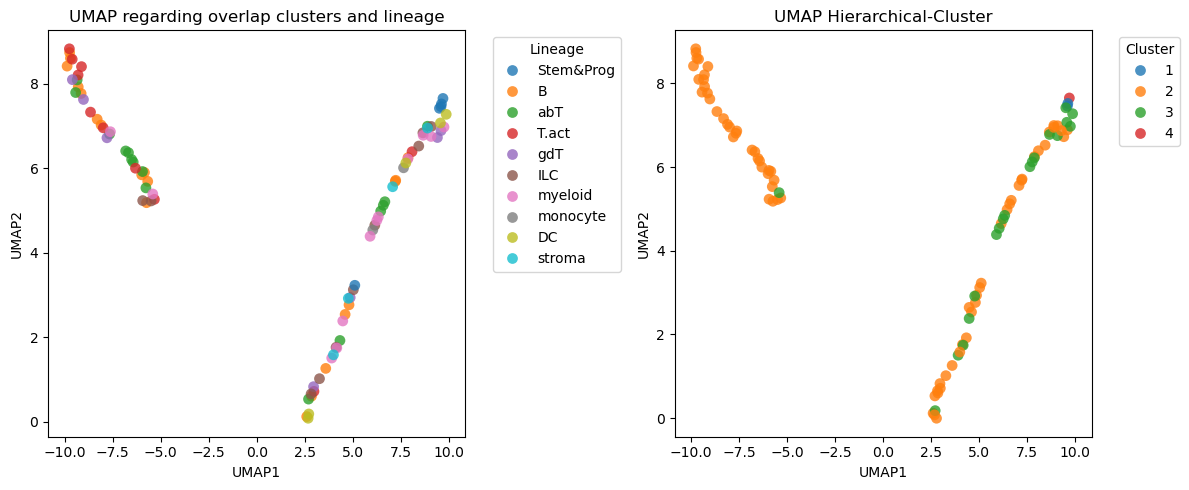

In [ ]:
# using UMAP to determine the overlap between the clusters and the true lineage

df_pca_without_outlier = df_pca[df_pca["PC1"] < 60].copy()
# should I do it with more than 2 PCs? If so, how many and how do I change them without an error?
pc_cols = [f"PC{i}" for i in range(1,2)]
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
embedding = reducer.fit_transform(df_pca_without_outliner[pc_cols])


df_pca_without_outliner["UMAP1"] = embedding[:,0]
df_pca_without_outliner["UMAP2"] = embedding[:,1]


fig, axes = plt.subplots(1,2, figsize=(12,5))

sns.scatterplot(
    ax=axes[0],
    data=df_pca_without_outliner,
    x="UMAP1", y="UMAP2",
    hue="Lineage",
    palette="tab10",
    s=60,
    linewidth=0,
    alpha=0.8
)
axes[0].set_title("UMAP regarding overlap clusters and lineage")
axes[0].legend(bbox_to_anchor=(1.05,1), loc="upper left", title="Lineage")

sns.scatterplot(
    ax=axes[1],
    data=df_pca_without_outliner,
    x="UMAP1", y="UMAP2",
    hue="cluster",        
    palette="tab10",
    s=60,
    linewidth=0,
    alpha=0.8
)
axes[1].set_title("UMAP Hierarchical‐Cluster")
axes[1].legend(bbox_to_anchor=(1.05,1), loc="upper left", title="Cluster")

plt.tight_layout()
plt.show()

#### iv. Define different classes of peaks based on signal + variation

##### a) Cluster CREs based on ATAC-signal

In [78]:
#reduce ATAC_scaled to cell-type only columns
non_signal_cols = ['mm10.60way.phastCons_scores', '_-log10_bestPvalue']
ATAC_scaled_ct = ATAC_scaled.drop(columns=non_signal_cols)
ATAC_scaled_ct.head()

,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM,proB.CLP.BM,proB.FrA.BM,proB.FrBC.BM,preB.FrD.BM,B.FrE.BM,B1b.PC,...,DC.8+.Sp,DC.pDC.Sp,DC.103+11b+.SI,DC.103+11b-.SI,FRC.SLN,IAP.SLN,BEC.SLN,LEC.SLN,Ep.MEChi.Th,peak_mean_signal
0,-0.622619,-0.913335,-0.818014,-0.843321,0.867794,-0.931503,-0.956155,0.241998,-0.977376,-0.882360,...,-0.867550,1.323434,-0.147860,-0.842635,1.530753,-0.931429,-0.984957,1.270846,-0.044332,-0.285864
1,-0.622619,0.737160,-0.818014,-0.843278,-0.960118,-0.931490,-0.956118,-1.104052,-0.977401,-0.882315,...,-0.867550,-0.231432,-0.903931,-0.842659,-0.994405,-0.931381,1.362299,-0.510506,-0.887236,-0.449898
2,0.723878,-0.913378,-0.818014,-0.843321,-0.960118,-0.931503,-0.956135,1.178320,-0.977390,-0.882360,...,-0.867524,0.386909,-0.903904,-0.842659,-0.991005,0.906252,-0.317633,1.234219,-0.887283,-0.567386
3,-0.622619,-0.913378,-0.818063,-0.843321,-0.960101,-0.931487,-0.956135,1.296989,-0.977364,-0.882360,...,0.930837,-1.047119,-0.903951,-0.842611,1.498200,-0.931381,1.603222,1.234219,-0.887283,-0.488935
4,-0.622619,-0.913378,-0.818063,-0.843321,-0.960118,-0.931490,0.543993,1.178320,-0.977390,-0.882334,...,-0.867550,-1.047119,0.710273,-0.842635,-0.994405,-0.931393,-0.317633,0.004627,1.689424,-0.391909


In [79]:
K = range(1, 11)
a = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(ATAC_scaled_ct)
    a.append(kmeans.inertia_)

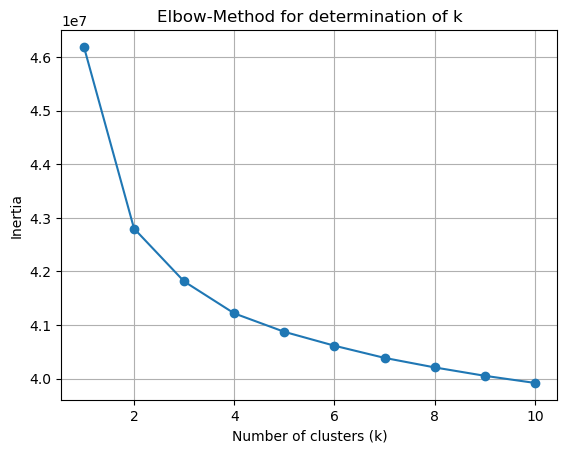

In [80]:
#Elbow-Plot to choose optimal cluster number
plt.plot(K, a, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow-Method for determination of k')
plt.grid(True)
plt.show()

In [81]:
#probably a knik at k=4, but we will also have a look at k=3 and k=5
#Reducing to 10 dimensions through PCA 
pca = PCA(n_components=10)
ATAC_pca10 = pca.fit_transform(ATAC_scaled_ct)

In [82]:
#try clustering with k=(3,4,5) 
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_3.fit(ATAC_scaled_ct)

kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_4.fit(ATAC_scaled_ct)

kmeans_5 = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans_5.fit(ATAC_scaled_ct)

labels_3 = kmeans_3.labels_
labels_4 = kmeans_4.labels_
labels_5 = kmeans_5.labels_

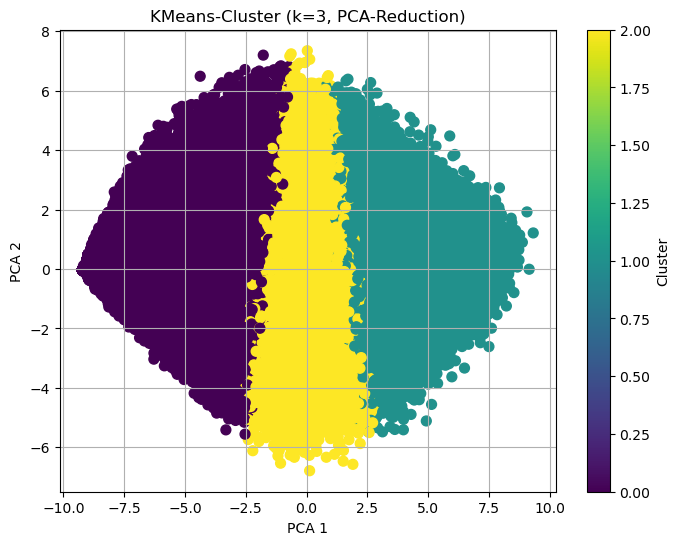

In [83]:
#to visualize PCA und Cluster-Plot 
pca = PCA(n_components=2)
ATAC_pca = pca.fit_transform(ATAC_scaled_ct)

#for k=3
plt.figure(figsize=(8,6))
plt.scatter(ATAC_pca[:, 0], ATAC_pca[:, 1], c=labels_3, cmap='viridis', s=50)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('KMeans-Cluster (k=3, PCA-Reduction)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

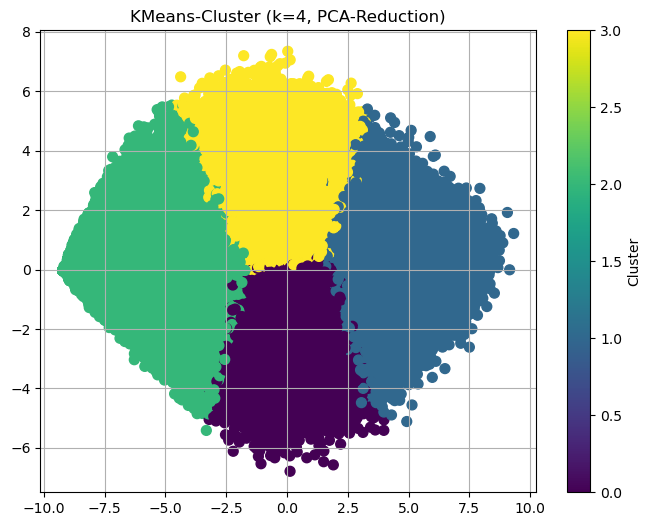

In [84]:
#for k=4
plt.figure(figsize=(8,6))
plt.scatter(ATAC_pca[:, 0], ATAC_pca[:, 1], c=labels_4, cmap='viridis', s=50)
plt.title('KMeans-Cluster (k=4, PCA-Reduction)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

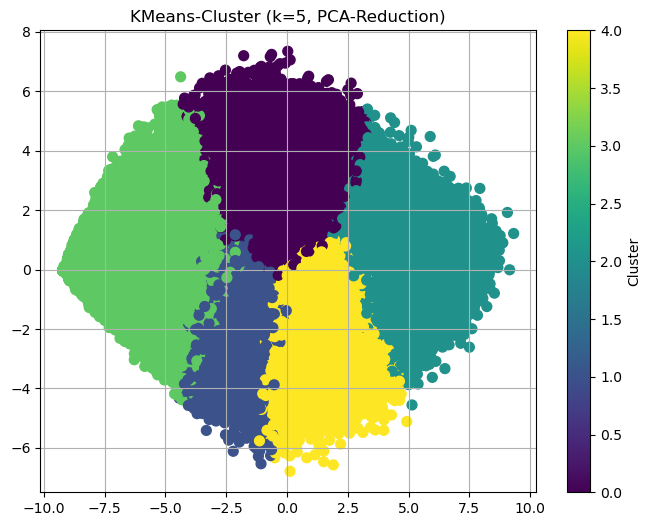

In [85]:
#for k=5
plt.figure(figsize=(8,6))
plt.scatter(ATAC_pca[:, 0], ATAC_pca[:, 1], c=labels_5, cmap='viridis', s=50)
plt.title('KMeans-Cluster (k=5, PCA-Reduction)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

Since the Elbow-Plot showed an assumable knik at k=4 and the clusters look good as well, we will continue the analysis with k=4.

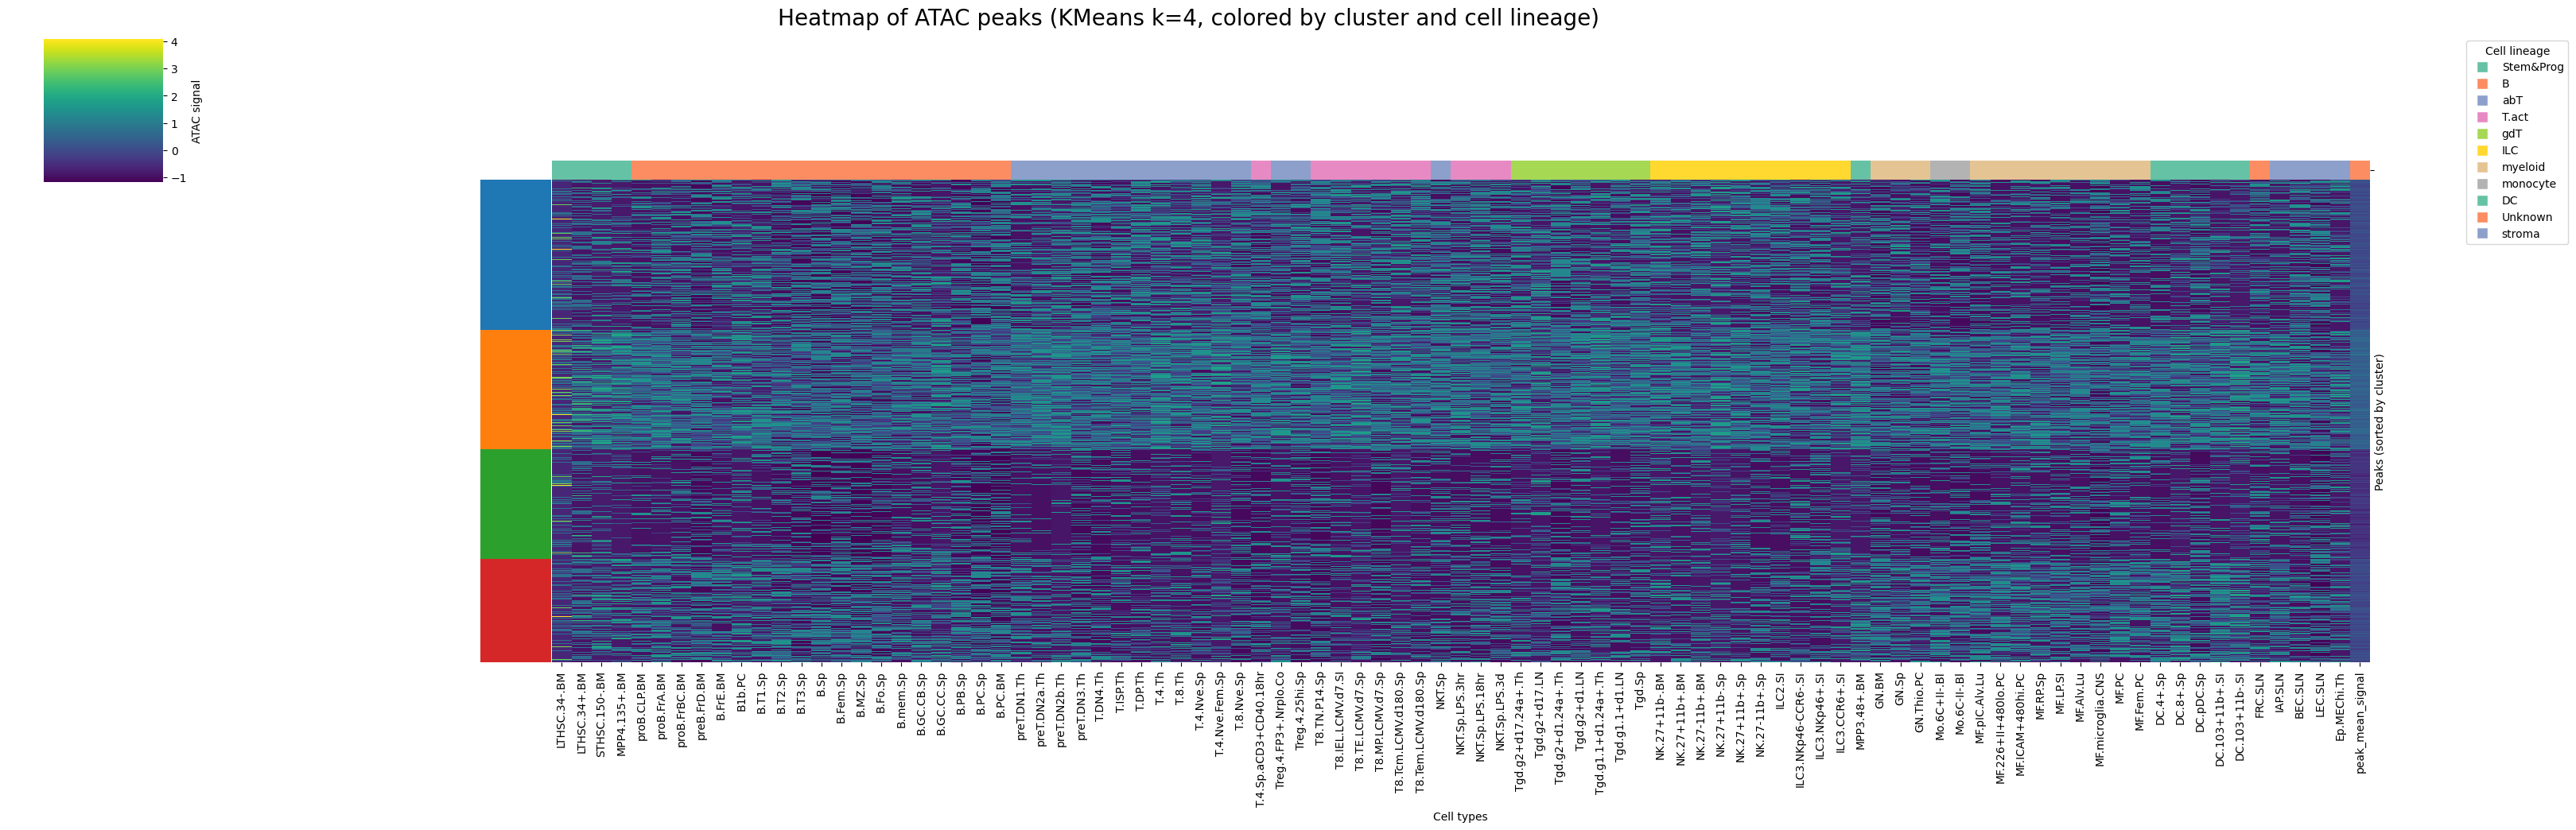

In [86]:
# Add cluster labels to DataFrame
ATAC_scaled_ct["cluster"] = labels_4  # labels_4 = from KMeans(n_clusters=4)

# Sort peaks by cluster
ATAC_sorted = ATAC_scaled_ct.sort_values("cluster")

# Define cluster colors (e.g., 4 clusters)
cluster_colors = sns.color_palette("tab10", 4)
row_colors = [cluster_colors[i] for i in ATAC_sorted["cluster"]]

# Remove 'cluster' column for the heatmap itself
heatmap_data = ATAC_sorted.drop(columns="cluster")

# Load QC file to map cell types to lineages
QC = pd.read_csv("data/ATAC_QCmatric.csv", sep=";")
QC.columns = QC.columns.str.strip()
QC["CellType"] = QC["CellType"].str.strip()
QC["Lineage"] = QC["Lineage"].str.strip()

# Create mapping from cell type to lineage (one per cell type)
celltype_to_lineage = QC.drop_duplicates("CellType").set_index("CellType")["Lineage"]

# Extract column names (= cell types) from heatmap_data
cell_types = heatmap_data.columns.tolist()

# Create column colors: map each cell type to its lineage color
lineages = [celltype_to_lineage.get(ct, "Unknown") for ct in cell_types]
unique_lineages = pd.unique(lineages)
palette = dict(zip(unique_lineages, sns.color_palette("Set2", len(unique_lineages))))
col_colors = pd.Series(lineages, index=cell_types).map(palette)

# Draw the heatmap
g = sns.clustermap(
    heatmap_data,
    cmap="viridis",
    yticklabels=False,
    row_colors=row_colors,
    col_colors=col_colors,
    col_cluster=False,
    row_cluster=False,
    figsize=(30, 10),
    cbar_kws={'label': 'ATAC signal'}
)

# Add title and axis labels
plt.suptitle("Heatmap of ATAC peaks (KMeans k=4, colored by cluster and cell lineage)", y=1.02, fontsize=20)
g.ax_heatmap.set_xlabel("Cell types")
g.ax_heatmap.set_ylabel("Peaks (sorted by cluster)")
g.ax_col_dendrogram.legend(
    handles=[plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=col, markersize=10, label=lab)
             for lab, col in palette.items()],
    title="Cell lineage",
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

plt.show()


##### b) Visualize behaviour of clustered regions

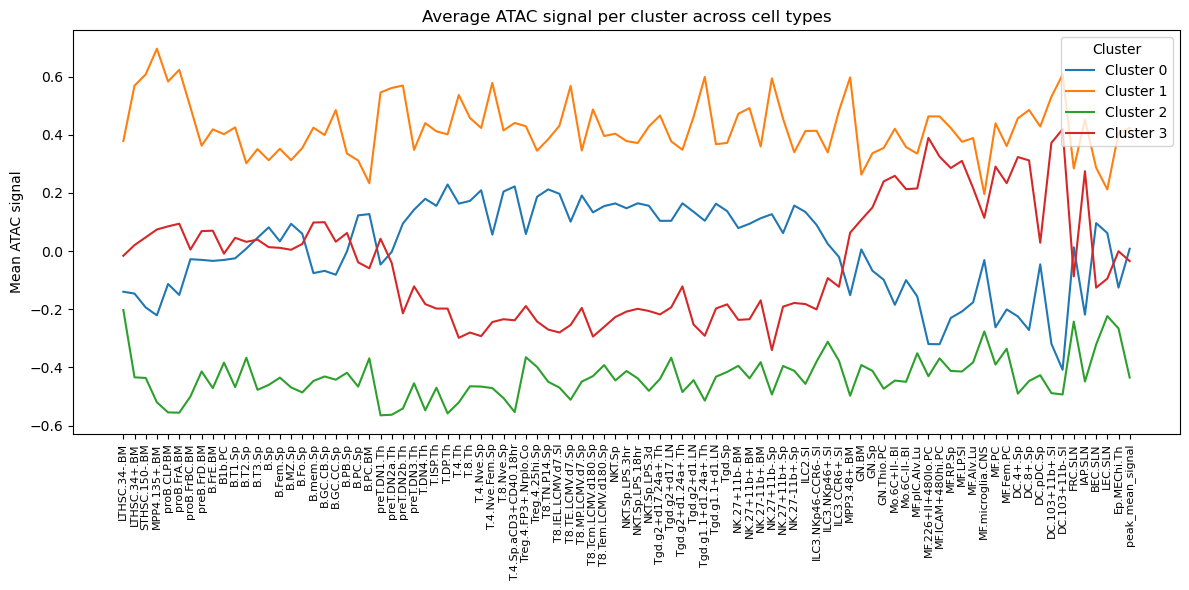

In [87]:
# Reassign cluster labels
ATAC_scaled_ct["cluster"] = labels_4

# Group peaks by cluster and compute mean per cell type (column)
mean_per_cluster = ATAC_scaled_ct.groupby("cluster").mean()

# Line plot: signal trend across cell types
plt.figure(figsize=(12, 6))
for i in mean_per_cluster.index:
    plt.plot(mean_per_cluster.columns, mean_per_cluster.loc[i], label=f'Cluster {i}')
plt.legend(title="Cluster")
plt.title("Average ATAC signal per cluster across cell types")
plt.ylabel("Mean ATAC signal")
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()
plt.show()


##### c) Define cell lineage-specific CRE clusters

c:\Users\annal\miniconda3\envs\envBCells1\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


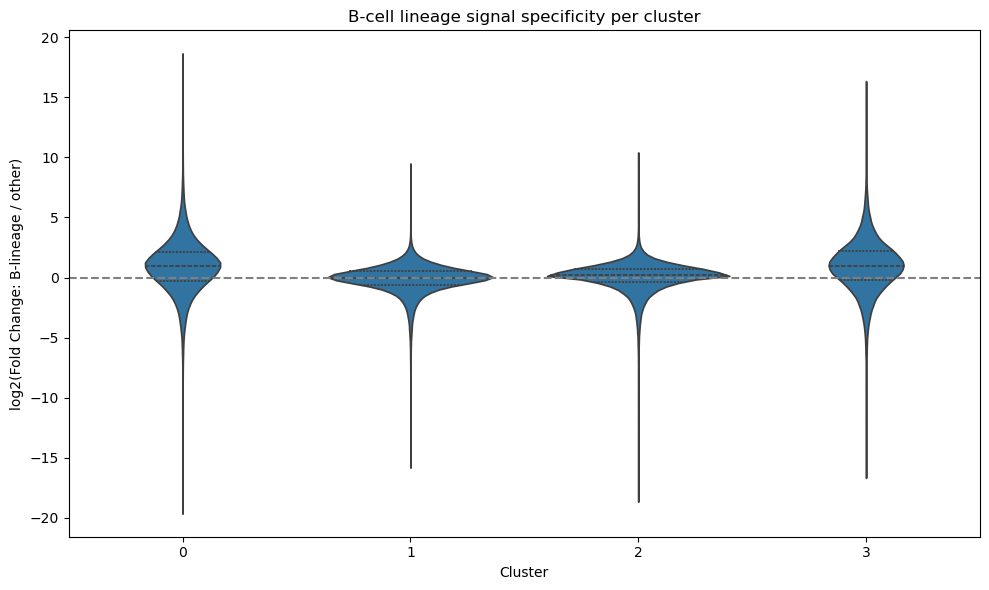

B-lineage-specific clusters: [0, 3]


In [88]:
# Load QC file to map cell types to lineage 
QC = pd.read_csv("data/ATAC_QCmatric.csv", sep=";")
QC.columns = QC.columns.str.strip()
QC["CellType"] = QC["CellType"].str.strip()
QC["Lineage"] = QC["Lineage"].str.strip()

# Get cell types assigned to the B-cell lineage 
b_lineage_celltypes = QC[QC["Lineage"] == "B"]["CellType"].tolist()

# Separate signal matrix and clusters 
signal_data = ATAC_scaled_ct.drop(columns="cluster")
clusters = ATAC_scaled_ct["cluster"]

# Filter columns for B-cells based on QC file 
b_cell_cols = [col for col in signal_data.columns if col in b_lineage_celltypes]
other_cols = [col for col in signal_data.columns if col not in b_cell_cols]

# Safety check
if len(b_cell_cols) == 0:
    raise ValueError("No B-lineage cell type columns found!")

# Calculate mean signal per peak 
b_signal = signal_data[b_cell_cols].mean(axis=1)
other_signal = signal_data[other_cols].mean(axis=1)

# Compute fold-change (B / others) 
fold_change = b_signal / (other_signal + 1e-9)

# Combine into DataFrame 
fc_cluster_df = pd.DataFrame({
    "fold_change": fold_change,
    "cluster": clusters
})

# Log2 transform for symmetry 
fc_cluster_df["log2_fc"] = np.log2(fc_cluster_df["fold_change"] + 1e-9)

# Violin plot: B-cell specificity per cluster 
plt.figure(figsize=(10,6))
sns.violinplot(x="cluster", y="log2_fc", data=fc_cluster_df, inner="quartile")
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel("Cluster")
plt.ylabel("log2(Fold Change: B-lineage / other)")
plt.title("B-cell lineage signal specificity per cluster")
plt.tight_layout()
plt.show()

# Identify B-lineage-specific clusters (e.g., mean log2FC > 1.5) 
mean_log2fc_per_cluster = fc_cluster_df.groupby("cluster")["log2_fc"].mean()
b_specific_clusters = mean_log2fc_per_cluster[mean_log2fc_per_cluster > 0.4].index.tolist()

print("B-lineage-specific clusters:", b_specific_clusters)


Clusters 0 and 2 show significantly higher B-cell signal compared to other cell types, indicating these clusters contain regulatory elements that are likely specific to B-cell lineage. This suggests that these clusters represent cell lineage-specific CREs important for B-cell function.

##### d) Differences between cell-lineage-specific CRE clusters → activity

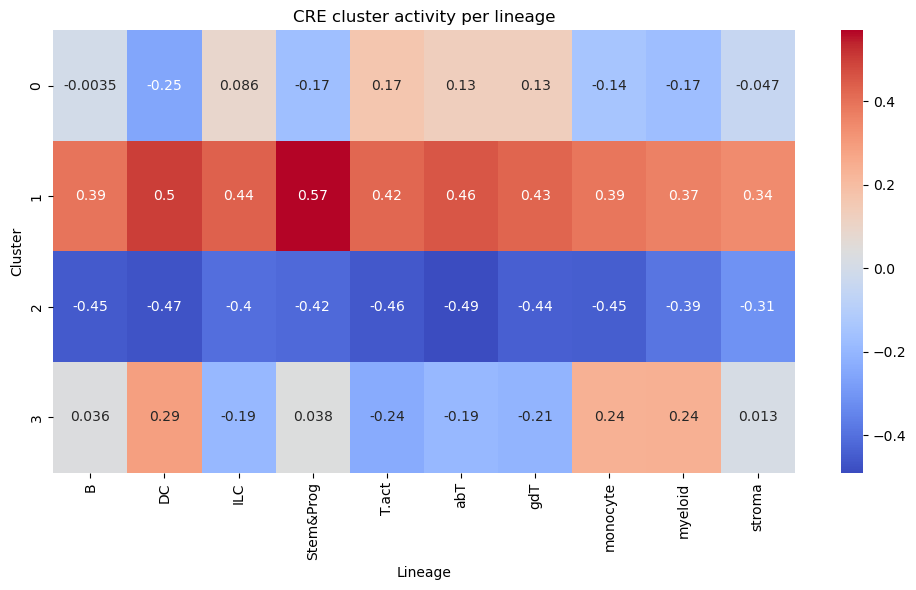

In [89]:
# 1. Load QC matrix and create CellType → Lineage mapping
QC = pd.read_csv("data/ATAC_QCmatric.csv", sep=";")
QC.columns = QC.columns.str.strip()
QC["CellType"] = QC["CellType"].str.strip()
QC["Lineage"] = QC["Lineage"].str.strip()

celltype_to_lineage = QC.drop_duplicates("CellType").set_index("CellType")["Lineage"]

# 2. Extract ATAC signal data and cluster labels
signal_data = ATAC_scaled_ct.drop(columns="cluster")
clusters = ATAC_scaled_ct["cluster"]

# 3. Map each column (cell type) to its lineage
lineage_per_column = signal_data.columns.map(celltype_to_lineage)

# Optional: remove cell types not in QC (i.e., lineage = NaN)
valid_columns = ~lineage_per_column.isna()
signal_data = signal_data.loc[:, valid_columns]
lineage_per_column = lineage_per_column[valid_columns]

# Rename columns to lineage
signal_data.columns = lineage_per_column

# 4. Calculate mean signal per lineage
lineage_means = signal_data.groupby(signal_data.columns, axis=1).mean()

# 5. Add cluster labels back
lineage_means["cluster"] = clusters.values

# 6. Average signal per cluster across lineages
cluster_lineage_activity = lineage_means.groupby("cluster").mean()

# 7. Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_lineage_activity, cmap="coolwarm", annot=True)
plt.title("CRE cluster activity per lineage")
plt.xlabel("Lineage")
plt.ylabel("Cluster")
plt.tight_layout()
plt.show()
